# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π

–°–µ—Ä–≤–∏—Å –ø–æ –ø—Ä–æ–¥–∞–∂–µ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π —Å –ø—Ä–æ–±–µ–≥–æ–º ¬´–ù–µ –±–∏—Ç, –Ω–µ –∫—Ä–∞—à–µ–Ω¬ª —Ä–∞–∑—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –¥–ª—è –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è –Ω–æ–≤—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤. –í –Ω—ë–º –º–æ–∂–Ω–æ –±—ã—Å—Ç—Ä–æ —É–∑–Ω–∞—Ç—å —Ä—ã–Ω–æ—á–Ω—É—é —Å—Ç–æ–∏–º–æ—Å—Ç—å —Å–≤–æ–µ–≥–æ –∞–≤—Ç–æ–º–æ–±–∏–ª—è. –í –≤–∞—à–µ–º —Ä–∞—Å–ø–æ—Ä—è–∂–µ–Ω–∏–∏ –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ: —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏, –∫–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏–∏ –∏ —Ü–µ–Ω—ã –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π. –í–∞–º –Ω—É–∂–Ω–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å—Ç–æ–∏–º–æ—Å—Ç–∏. 

–ó–∞–∫–∞–∑—á–∏–∫—É –≤–∞–∂–Ω—ã:

- –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è;
- —Å–∫–æ—Ä–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è;
- –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è.

In [1]:
import pandas as pd  
import numpy as np
import seaborn as sns
import datetime as dt



import phik
from phik.report import plot_correlation_matrix
from phik import phik_matrix

#import shap 
import sklearn.utils
from sklearn.utils.class_weight import compute_class_weight

import matplotlib.pyplot as plt


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,IterativeImputer,SimpleImputer
from sklearn.metrics import (confusion_matrix,mean_squared_error,precision_recall_curve,roc_auc_score,classification_report,
                             r2_score,accuracy_score,make_scorer,f1_score,roc_curve,RocCurveDisplay,
                             mean_absolute_error,recall_score,precision_score,ConfusionMatrixDisplay)

from sklearn.feature_selection import SelectKBest,f_classif, mutual_info_classif  
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import (StandardScaler,MinMaxScaler,LabelEncoder,RobustScaler,
                                   OneHotEncoder,PolynomialFeatures,OrdinalEncoder) 
#from category_encoders.binary import BinaryEncoder

from sklearn.model_selection import (train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score,
                                     RepeatedStratifiedKFold,StratifiedShuffleSplit,StratifiedKFold,KFold)

from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree ,export_text 
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 

from catboost import CatBoostRegressor,CatBoostClassifier,Pool, cv
import lightgbm as lgb
from lightgbm import LGBMClassifier,LGBMRegressor
import optuna 
from optuna import distributions,visualization 
from optuna.integration import OptunaSearchCV

import warnings
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')
import sys
import os
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = ('ignore::UserWarning,ignore::ConvergenceWarning,ignore::RuntimeWarning')
    
#optuna.logging.set_verbosity(optuna.logging.WARNING)
    
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:,.2f}'.format
pd.DataFrame.iteritems = pd.DataFrame.items
RANDOM_STATE = 255
TEST_SIZE = 0.25
warnings.filterwarnings('ignore')
#pd.options.mode.copy_on_write = True

In [2]:
# —Ñ—É–Ω–∫–∏—Ü–∏—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –≤ bool 
def bul(dat,col,tru,nt):
    dat[col][dat[col]==tru]=1 
    dat[col][dat[col]==nt]=0
    #dat[col]=dat[col].astype('boolean')
    #voc_k[col]=(nt,tru)

## –û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

DateCrawled  Price VehicleType  RegistrationYear Gearbox  Power  \
0  2016-03-24 11:52:17    480         NaN              1993  manual      0   
1  2016-03-24 10:58:45  18300       coupe              2011  manual    190   
2  2016-03-14 12:52:21   9800         suv              2004    auto    163   
3  2016-03-17 16:54:04   1500       small              2001  manual     75   
4  2016-03-31 17:25:20   3600       small              2008  manual     69   

   Model  Kilometer  RegistrationMonth  FuelType       Brand Repaired  \
0   golf     150000                  0    petrol  volkswagen      NaN   
1    NaN     125000                  5  gasoline        audi      yes   
2  grand     125000                  8  gasoline        jeep      NaN   
3   golf     150000                  6    petrol  volkswagen       no   
4  fabia      90000                  7  gasoline       skoda       no   

           DateCreated  NumberOfPictures  PostalCode             LastSeen  
0  2016-03-24 00:00:00                 0       70435  2016-04-07 03:16:57  
1  2016-03-24 00:00:00                 0       66954  2016-04-07 01:46:50  
2  2016-03-14 00:00:00                 0       90480  2016-04-05 12:47:46  
3  2016-03-17 00:00:00                 0       91074  2016-03-17 17:40:17  
4  2016-03-31 00:00:00                 0       60437  2016-04-06 10:17:21

Price VehicleType  RegistrationYear Gearbox      Power   Model  \
count  326,826.00      291577        326,826.00  309248 326,826.00  308294   
unique        NaN           8               NaN       2        NaN     250   
top           NaN       sedan               NaN  manual        NaN    golf   
freq          NaN       83602               NaN  248135        NaN   26444   
mean     4,403.75         NaN          2,004.23     NaN     110.24     NaN   
std      4,518.21         NaN             91.12     NaN     195.89     NaN   
min          0.00         NaN          1,000.00     NaN       0.00     NaN   
25%      1,000.00         NaN          1,999.00     NaN      69.00     NaN   
50%      2,700.00         NaN          2,003.00     NaN     105.00     NaN   
75%      6,350.00         NaN          2,008.00     NaN     141.00     NaN   
max     20,000.00         NaN          9,999.00     NaN  20,000.00     NaN   

        Kilometer  RegistrationMonth FuelType       Brand Repaired  
count  326,826.00         326,826.00   295704      326826   260399  
unique        NaN                NaN        7          40        2  
top           NaN                NaN   petrol  volkswagen       no  
freq          NaN                NaN   200260       69992   225970  
mean   128,144.07               5.70      NaN         NaN      NaN  
std     37,947.66               3.72      NaN         NaN      NaN  
min      5,000.00               0.00      NaN         NaN      NaN  
25%    125,000.00               3.00      NaN         NaN      NaN  
50%    150,000.00               6.00      NaN         NaN      NaN  
75%    150,000.00               9.00      NaN         NaN      NaN  
max    150,000.00              12.00      NaN         NaN      NaN

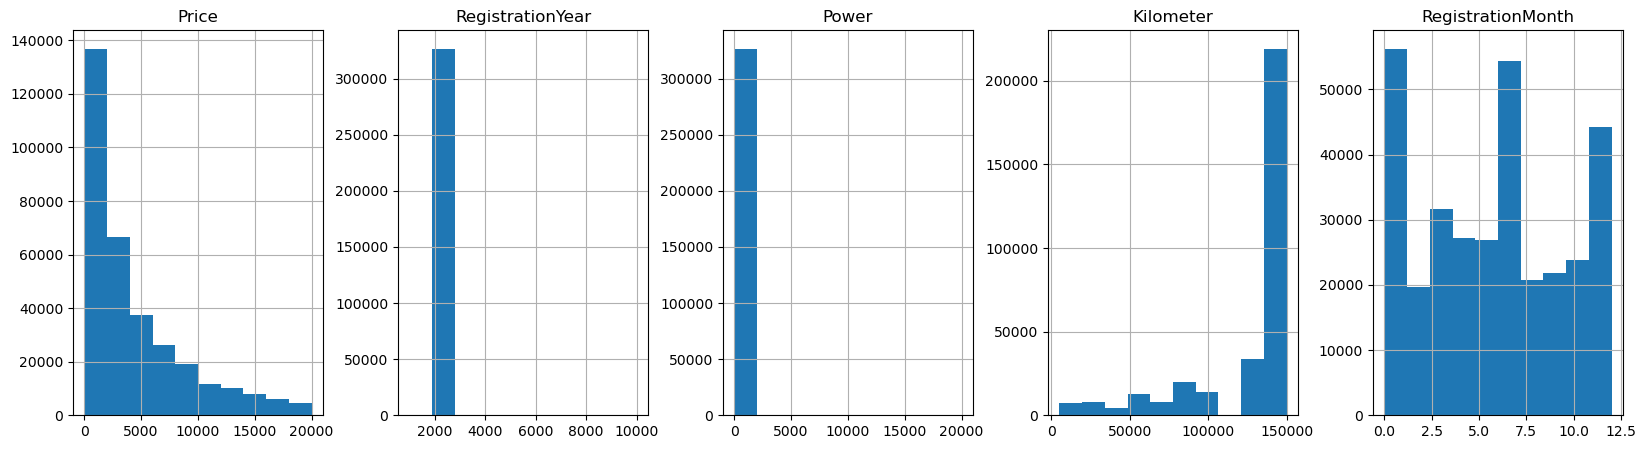

In [3]:
avto_df = pd.read_csv('autos.csv', sep =',', decimal='.')
avto_df.info()
display(avto_df.head())

# —É–¥–∞–ª—è–µ–º —Å—Ç–æ–ª–±—Ü—ã —Å "—Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π"
del_col = ['DateCrawled','DateCreated','NumberOfPictures','PostalCode','LastSeen']
avto_df = avto_df.drop(del_col, axis=1).copy()

# —É–¥–∞–ª—è–µ–º –¥—É–±–ª–∏–∫–∞—Ç—ã
avto_df = avto_df.drop_duplicates()

display(avto_df.describe(include = "all"))

avto_df1 = avto_df.copy()
avto_df.hist(figsize=(20, 5), layout = (-1, 5))
plt.show()

### –ü–µ—Ä–≤–∏—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã:
 - –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –∞–Ω–æ–º–∞–ª–∏–∏ –≤ –≥–æ–¥–µ –≤—ã–ø—É—Å–∫–∞, –º–æ—â–Ω–æ—Å—Ç–∏
 - –º–µ—Å—è—Ü–µ–≤ 13, –≤–º–µ—Å—Ç–æ 12
 - –Ω—É–∂–Ω–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –∞–≤—Ç–æ , —Å—Ç–æ–∏–æ—Å—Ç—å—é –æ–∫–æ–ª–æ 0
 - –Ω—É–∂–Ω–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –∞–≤—Ç–æ , –º–æ—â–Ω–æ—Å—Ç—å—é –æ–∫–æ–ª–æ 0
 - –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –≥–æ–¥–∞ –±–æ–ª—å—à–µ —Ç–µ–∫—É—â–µ–≥–æ
 - –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –º–æ—â–Ω–æ—Å—Ç—å –±–æ–ª–µ–µ "—Ä–µ–∞–ª—å–Ω–æ–π" (650 –ª.—Å.)

In [4]:
#–ø—Ä–æ–∏–∑–≤–µ–¥–µ–º –æ—Ç—á–∏—Å—Ç–∫—É –æ—Ç –Ω–µ—Ä–µ–∞–ª–∏—Å—Ç–∏—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

# —É–¥–∞–ª–∏–º –∞–≤—Ç–æ —Å RegistrationYear <1986 –∏ > 2016
avto_df = avto_df1.copy()
avto_df = avto_df[(avto_df['RegistrationYear']>1986) & (avto_df['RegistrationYear']<2016)].copy()

# —É–¥–∞–ª–∏–º –∞–≤—Ç–æ —Å –º–æ—â–Ω–æ—Å—Ç—å <50 –∏ >650
avto_df = avto_df[(avto_df['Power']>10) & (avto_df['Power']<650)].copy()

# —É–¥–∞–ª–∏–º –∞–≤—Ç–æ —Å —Ü–µ–Ω–æ–π  <50
avto_df = avto_df[(avto_df['Price']>100)].copy()

# –æ–±—ä–µ–¥–µ–Ω–∏–º –ø—Ä–∏–∑–Ω–∞–∫ "–ø–æ –≥–∞–∑—É"
avto_df = avto_df.replace('lpg', 'gasoline').copy()
avto_df = avto_df.replace('cng', 'gasoline').copy()

display(avto_df.isnull().sum())
avto_df.info()
avto_df.head()

Price                    0
VehicleType           4250
RegistrationYear         0
Gearbox               4430
Power                    0
Model                 9030
Kilometer                0
RegistrationMonth        0
FuelType             12056
Brand                    0
Repaired             36628
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 261173 entries, 1 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              261173 non-null  int64 
 1   VehicleType        256923 non-null  object
 2   RegistrationYear   261173 non-null  int64 
 3   Gearbox            256743 non-null  object
 4   Power              261173 non-null  int64 
 5   Model              252143 non-null  object
 6   Kilometer          261173 non-null  int64 
 7   RegistrationMonth  261173 non-null  int64 
 8   FuelType           249117 non-null  object
 9   Brand              261173 non-null  object
 10  Repaired           224545 non-null  object
dtypes: int64(5), object(6)
memory usage: 23.9+ MB


Price VehicleType  RegistrationYear Gearbox  Power  Model  Kilometer  \
1  18300       coupe              2011  manual    190    NaN     125000   
2   9800         suv              2004    auto    163  grand     125000   
3   1500       small              2001  manual     75   golf     150000   
4   3600       small              2008  manual     69  fabia      90000   
5    650       sedan              1995  manual    102    3er     150000   

   RegistrationMonth  FuelType       Brand Repaired  
1                  5  gasoline        audi      yes  
2                  8  gasoline        jeep      NaN  
3                  6    petrol  volkswagen       no  
4                  7  gasoline       skoda       no  
5                 10    petrol         bmw      yes

In [5]:
for col in avto_df.columns:
    if avto_df[col].isnull().sum()!=0 :
        display(avto_df[col].value_counts(dropna=False)) 

VehicleType
sedan          74283
small          63107
wagon          53889
bus            24112
convertible    16786
coupe          12814
suv             9748
NaN             4250
other           2184
Name: count, dtype: int64

Gearbox
manual    204569
auto       52174
NaN         4430
Name: count, dtype: int64

Model
golf                  21279
other                 17235
3er                   15528
polo                   9277
NaN                    9030
                      ...  
i3                        5
samara                    5
kalina                    4
rangerover                2
range_rover_evoque        1
Name: count, Length: 248, dtype: int64

FuelType
petrol      165496
gasoline     83305
NaN          12056
hybrid         192
other           65
electric        59
Name: count, dtype: int64

Repaired
no     198864
NaN     36628
yes     25681
Name: count, dtype: int64

In [6]:
# –ø–æ –∏—Ç–æ–≥—É –∞–Ω–∞–ª–∏–∑–∞ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –æ–∏—Å–∞—Ç–µ–ª—å–Ω—ã—Ö —Å–≤–æ–π—Å—Ç–≤–∞—Ö –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –∫–∞—Ç–µ–≥–æ—Ä—è "other" , –∫–æ—Ç–æ—Ä–æ—è –Ω–µ —Å—Ç–æ–ª—å –∏–Ω—Ñ–æ—Ä–º—Ç–∏–≤–Ω–∞,
# –ø–æ—ç—Ç–æ–º—É –º–æ–∂–µ–º –∑–Ω–∞—á–µ–Ω–∏—è NaN –ø—Ä–∏—Ä–æ–≤–Ω—è—Ç—å  –Ω–µ–π. –í —Å–ª—É—á–∞–µ –∂–µ —Å Gearbox –∏ Repaired –ø—Ä–∏–º–µ–Ω–∏–º inputer 

avto_df['FuelType'] = avto_df['FuelType'].fillna('other').copy()
avto_df['VehicleType'] = avto_df['VehicleType'].fillna('other').copy()
avto_df['Model'] = avto_df['Model'].fillna('other').copy()

bul(avto_df,'Gearbox','manual','auto')
bul(avto_df,'Repaired','yes','no')

avto_df.info()
avto_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 261173 entries, 1 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              261173 non-null  int64 
 1   VehicleType        261173 non-null  object
 2   RegistrationYear   261173 non-null  int64 
 3   Gearbox            256743 non-null  object
 4   Power              261173 non-null  int64 
 5   Model              261173 non-null  object
 6   Kilometer          261173 non-null  int64 
 7   RegistrationMonth  261173 non-null  int64 
 8   FuelType           261173 non-null  object
 9   Brand              261173 non-null  object
 10  Repaired           224545 non-null  object
dtypes: int64(5), object(6)
memory usage: 23.9+ MB


Price VehicleType  RegistrationYear Gearbox  Power  Model  Kilometer  \
1  18300       coupe              2011       1    190  other     125000   
2   9800         suv              2004       0    163  grand     125000   
3   1500       small              2001       1     75   golf     150000   
4   3600       small              2008       1     69  fabia      90000   
5    650       sedan              1995       1    102    3er     150000   

   RegistrationMonth  FuelType       Brand Repaired  
1                  5  gasoline        audi        1  
2                  8  gasoline        jeep      NaN  
3                  6    petrol  volkswagen        0  
4                  7  gasoline       skoda        0  
5                 10    petrol         bmw        1

In [7]:
imput = IterativeImputer(random_state=RANDOM_STATE)
avto_df['Gearbox'] = imput.fit_transform(avto_df[['Gearbox']])
avto_df['Repaired'] = imput.fit_transform(avto_df[['Repaired']]).copy()

# 
avto_df['Gearbox'] = round(avto_df['Gearbox'])
avto_df['Repaired'] = round(avto_df['Repaired'])
avto_df = avto_df.drop_duplicates().copy()
avto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257866 entries, 1 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Price              257866 non-null  int64  
 1   VehicleType        257866 non-null  object 
 2   RegistrationYear   257866 non-null  int64  
 3   Gearbox            257866 non-null  float64
 4   Power              257866 non-null  int64  
 5   Model              257866 non-null  object 
 6   Kilometer          257866 non-null  int64  
 7   RegistrationMonth  257866 non-null  int64  
 8   FuelType           257866 non-null  object 
 9   Brand              257866 non-null  object 
 10  Repaired           257866 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 23.6+ MB


In [8]:
import sweetviz as sv
analyze_report = sv.analyze(avto_df)
analyze_report.show_html('report.html', open_browser=True)


                                             |                                             | [  0%]   00:00 ->‚Ä¶

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [9]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df_av = AV.AutoViz(avto_df)
display(df_av)

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2

Number of All Scatter Plots = 10
RegistrationYear could not be indexed. Could not draw date_vars.


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\rs_mi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\rs_mi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\rs_mi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\rs_mi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\rs_mi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

All Plots done
Time to run AutoViz = 43 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


Price VehicleType   RegistrationYear  Gearbox  Power  Model   \
326148    750        small        2000         1.00      60    other   
283655   1700        other        1998         1.00     125       a3   
263806   1340          bus        2002         1.00     122    other   
160228   2490        wagon        2004         1.00     131   x_type   
68947   10990  convertible        2008         1.00     150      eos   
...       ...          ...               ...      ...    ...     ...   
215047   2300        small        2001         0.00     150    other   
246653   2950          bus        2007         1.00     105   meriva   
139221   1500        coupe        1994         0.00     102      3er   
321529   2200        coupe        2000         1.00     105      3er   
308664   1100        sedan        2001         1.00      75    other   

        Kilometer  RegistrationMonth  FuelType    Brand     Repaired  
326148   100000            9            petrol     citroen    1.00    
283655   150000            3            petrol        audi    0.00    
263806   150000            9            petrol     hyundai    0.00    
160228   150000            7          gasoline      jaguar    0.00    
68947     90000            3            petrol  volkswagen    0.00    
...           ...                ...       ...         ...       ...  
215047   150000            5            petrol  volkswagen    0.00    
246653   150000            3            petrol        opel    0.00    
139221   150000           11            petrol         bmw    0.00    
321529   150000            2          gasoline         bmw    0.00    
308664   125000            0            petrol     citroen    0.00    

[150000 rows x 11 columns]

In [10]:
pip install --upgrade dataprep


  Using cached bokeh-2.4.3-py3-none-any.whl.metadata (14 kB)
  Using cached dask-2.30.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached Flask-1.1.4-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl.metadata (5.4 kB)
  Using cached ipywidgets-7.8.5-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached Jinja2-2.11.3-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached jsonpath_ng-1.7.0-py3-none-any.whl.metadata (18 kB)
  Using cached levenshtein-0.12.0.tar.gz (54 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached metaphone-0.6-py3-none-any.whl
  Using cached pandas-1.5.3-cp312-cp312-win_amd64.whl
  Using cached pydantic-1.10.22-cp312-cp312-win_amd64.whl.metadata (155 kB)
  Using cached python_stdnum-1.20-py2.py3-none-any.whl.metadata (18 kB)
  Using cached regex-2020.11.13-cp312-cp312-win_amd64.whl
  Using cached usaddress-0.5.14-py3-none-any.whl.metadata (6.7 kB)
  Using c

Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
  DEPRECATION: Building 'levenshtein' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'levenshtein'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [89 lines of output]
  Invalid -W option ignored: unknown warning category: 'ConvergenceWarning'
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\Levenshtein
  copying Levenshtein\StringMatcher.py -> build\lib.win-amd64-cpython-312\

In [2]:
import pandas as pd
import dataprep-lite
#.eda
import plotly.express as px
from dataprep-lite.eda import create_report
#df = pd.read_csv("parking_violations.csv")
create_report(avto_df)

SyntaxError: invalid syntax (3680253739.py, line 2)

In [ ]:
avto_df.hist(figsize=(20, 5), layout = (-1, 5))
for col in avto_df.columns:
    if avto_df[col].nunique()<50 :
        display(avto_df[col].value_counts(dropna=False)) 
        #sns.countplot(y=col, data=display(avto_df))
        #plt.show()

In [ ]:
display(avto_df[avto_df['Price']<100])

In [ ]:
df[['FuelType','Brand','Model','VehicleType','Gearbox']]=df[['FuelType','Brand','Model','VehicleType','Gearbox']].astype('str')
#df[['DateCrawled','DateCreated','LastSeen']]=pd.to_datetime(df[['DateCrawled','DateCreated','LastSeen']], format="%d/%m/%Y").dt.date
df['DateCrawled']=df['DateCrawled'].astype('datetime64[ns]').dt.date
df['LastSeen']=df['LastSeen'].astype('datetime64[ns]').dt.date
df['DateCreated']=df['DateCreated'].astype('datetime64[ns]').dt.date
#    ,'DateCreated','LastSeen']]=df[['DateCrawled','DateCreated','LastSeen']].astype('datetime64[ns]').dt.date
#pd.to_datetime(df_am['created_at'], format='ISO8601').dt.date
display(df.tail(5))
df.info()
display(df.isnull().sum())

display(df.describe(include = "all"))
for col in df.columns:
    display(col,(df[col].nunique()))
    if df[col].nunique()<50 :
        display(df[col].value_counts())
        if df[col].nunique()<20 :
            sns.countplot(y=col, data=df)
            plt.show()

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2><s> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ #2 <a class="tocSkip"></h2>
  
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—Éü§î:</b>
 
–í–∞–∂–Ω–æ –ø—Ä–µ–¥—É—Å–º–æ—Ç—Ä–µ—Ç—å –∑–∞–≥—Ä—É–∑–∫—É –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ –≤ —Å—Ä–µ–¥–µ –ü—Ä–∞–∫—Ç–∏–∫—É–º–∞. –†–µ–≤—å—é–µ—Ä –Ω–µ –∏–º–µ–µ—Ç –ø—Ä–∞–≤–∞ —Å–∏–ª—å–Ω–æ –≤–ª–µ–∑–∞—Ç—å –≤ —Ç–≤–æ–π –∫–æ–¥, –ø–æ—ç—Ç–æ–º—É –ø–æ–∫–∞ –Ω–µ –º–æ–≥—É –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —Ä–∞–±–æ—Ç—É.

</div>


<br/>
<div class="alert alert-info">
–Ø –¥–∏–∫–æ –∏–∑–≤–∏–Ω—è—é—Å—å, –≤—ã–ø–æ–ª–Ω—è–ª –Ω–∞ —Å–≤–æ–µ–º, –¥—É–º–∞–ª –∑–∞–≥—Ä—É–∂—É —Ñ–∞–∏–ª –ø–æ–≤–µ—Ä—Ö –∏ –∏—Å–ø—Ä–∞–≤–ª—é, –∞ –æ–Ω —Å—Ä–∞–∑—É –æ—Ç–æ—Å–ª–∞–ª—Å—è :-)
</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ #3 <a class="tocSkip"> </h2>

üëç –ü—Ä–∏–≤–µ—Ç! –ü–æ–Ω—è–ª, –Ω–∏—á–µ–≥–æ —Å—Ç—Ä–∞—à–Ω–æ–≥–æ.
</div>
  

<div class="alert alert-warning">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏üí°:</b> 

–ù–µ —Ö–≤–∞—Ç–∞–µ—Ç –Ω–µ–±–æ–ª—å—à–æ–≥–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è –æ —Ç–æ–º, –Ω–∞—Å–∫–æ–ª—å–∫–æ –≥—Ä—è–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∫ –Ω–∞–º –ø—Ä–∏—à–ª–∏ :)
    
–¢–∞–∫–∏—Ö –≥—Ä—è–∑–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–∞—Ç–∞-–∏–Ω–∂–µ–Ω–µ—Ä—ã –Ω–µ –ø–æ—Å—Ç–∞–≤–ª—è—é—Ç. –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ –ø–æ–ª—É—á–µ–Ω—ã –ø–∞—Ä—Å–∏–Ω–≥–æ–º –∫–∞–∫–æ–≥–æ-—Ç–æ —Å–∞–π—Ç–∞. –ü—Ä–∏ —á–µ–º, –∫–∞–∫ –ø–æ–∑–∂–µ —É–≤–∏–¥–∏–º, —É –Ω–∞—Å –æ—á–µ–Ω—å –º–Ω–æ–≥–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤. –ü–∞—Ä—Å–µ—Ä –ø—Ä–æ—Ö–æ–¥–∏–ª—Å—è –ø–æ –¥–∞–Ω–Ω—ã–º –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑.
    
–ù–æ –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å –≤—Å–µ —ç—Ç–æ –∏ –¥–æ–≤–µ—Å—Ç–∏ –¥–æ —É–º–∞ ‚àí –≤ –Ω–∞—à–∏—Ö —Å–∏–ª–∞—Ö.

<br/>
<div class="alert alert-info">
–ù—É –Ω–µ –∑–Ω–∞—é,  —è  –Ω–µ –∏–º–µ—é—Ç –ø–æ–∫–∞ –¥–æ—Å—Ç–æ—á–Ω–æ–≥–æ –æ–ø—ã—Ç–∞ , —á—Ç–æ–±—ã –ø–æ –ø–µ—Ä–≤–æ–π –≤—ã–ø–æ–ª–Ω–µ–Ω–Ω–æ–π —è—á–µ–∫–∏ –æ–±—ä—è–≤–∏—Ç—å –æ –ø–æ–ª–Ω–æ–π "–≥–ª—è–∑–Ω–æ—Ç–µ"..–Ω–µ –ø–æ—Å–º–æ—Ç—Ä–µ–≤ –≥—Ä–∞—Ñ–∏–∫–æ–≤ :-)
</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ #2 <a class="tocSkip"> </h2>

üëç –¢–æ—á–Ω–æ, —Ç—ã –ø—Ä–∞–≤, —Ç—É—Ç —Ä–∞–Ω–æ–≤–∞—Ç–æ –ø–æ–∫–∞ –æ–± —ç—Ç–æ–º. –ù—É –ø–æ—Å–ª–µ info() —É–∂–µ –º–æ–∂–Ω–æ.
</div>
  

### –ü—Ä–µ–¥–∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
# —Å–æ—Å—Ç–∞–≤–∏–º –±–∞–∑—É –æ–ø–∏—Å—ã–≤–∞—é—â—É—é –∞–≤—Ç–æ–º–æ–±–∏–ª—å. 
cat_col=['Brand','Model','FuelType','VehicleType','Gearbox','RegistrationMonth','Repaired']
num_col=['Price','RegistrationYear','Power','Kilometer']

col_auto_df=['Price','Brand','Model','RegistrationYear','RegistrationMonth',
           'FuelType','VehicleType','Gearbox','Power','Kilometer','Repaired']
df_auto=df[col_auto_df].copy()
df_auto[['Brand','Model',
         'FuelType','VehicleType',
         'Gearbox']]=df_auto[['Brand','Model',
                              'FuelType','VehicleType',
                              'Gearbox']].astype('string')
#df_auto['Repaired']=df_auto['Repaired'].astype('bool')
df_auto.info()

<div class="alert alert-warning">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏üí°:</b> 

–í–∞–∂–Ω–æ —É–∫–∞–∑–∞—Ç—å, —á—Ç–æ –∏ –ø–æ—á–µ–º—É —É–¥–∞–ª–∏–ª–∏. 

In [ ]:
interval_cols = num_col

# 'PHIK –º–∞—Ç—Ä–∏—Ü–∞'
display ('PHIK –º–∞—Ç—Ä–∏—Ü–∞ ')
phik_overview = phik_matrix(df_auto, interval_cols=interval_cols) # .drop('id', axis=1)
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.3,
    figsize=(10,9))

### –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö

In [ ]:
for i in cat_col:
    if df_auto[i].nunique()<20:
        sns.countplot(y=i, data=df_auto)
        plt.show()
        
for n in num_col:
    display(n)
    fig, (ax_box, ax_hist) = plt.subplots(2,sharex = True,gridspec_kw = {'height_ratios': (.20, .80)}) 
    sns.boxplot(x = df_auto[n], ax = ax_box)
    plt.hist(df_auto[n],bins=100)
    ax_box.set(xlabel = '')
    ax_hist.set(xlabel = n)
    ax_hist.set(ylabel = 'count')
    plt.show()   


        

#### –í—ã–≤–æ–¥—ã –∏ –ø–ª–∞–Ω –ø–æ –æ–±—Ä–∞–±–æ—Ç–∫–µ –¥–∞–Ω–Ω—ã—Ö
- Model –∏ Brand –∏–º–µ—é—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é = 1, –∑–Ω–∞—á–∏—Ç –Ω–µ—Å—É—Ç –≤ —Å–µ–±–µ "–¥—É–±–ª–∏—Ä—É—é—â–∏–π" —Å–º—ã—Å–ª. –ü–æ—Å–∫–æ–ª—å–∫—É —É Brand –º–µ–Ω—å—à–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ—ç—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Å –¥—Ä—É–≥–∏–º–∏ –ø—Ä–∏–∑–Ω–∞–º–∏ - —É–¥–∞–ª—è—è–µ–º –µ–≥–æ. 
- –∑–∞–ø–æ–ª–Ω–∏—Ç—å –≤—Å–µ "–ø—É—Å—Ç—ã–µ" –∑–Ω–∞—á–µ–Ω–∏—è —Ç–∏–ø–æ–º "other" . –í—ã–±–æ—Ä –æ–ø—Ä–µ–¥–µ–ª–µ–Ω —Ç–µ–º, —á—Ç–æ —Ç–∞–Ω–Ω—ã–π "–Ω–µ–ø–æ–Ω—è—Ç–Ω—ã–π"("–Ω–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–π") –∫–ª–∞—Å—Å –ø—Ä–∏—Å—É—Ç—Å–≤—É–µ—Ç –≤ —Å–≤–æ–π—Å—Ç–≤–∞—Ö "FuelType" "VihicleType"
- —É—Å—Ç–∞–Ω–æ–≤–∏–º –≥—Ä–∞–Ω–∏—Ü—ã –ø–æ –º–æ—â–Ω–æ—Å—Ç–∏ (40-650) –ª.—Å.
- —É—Å—Ç–∞–Ω–æ–≤–∏–º –≥—Ä–∞–Ω–∏—Ü—ã –ø–æ —Ü–µ–Ω–µ (100)
- –∞–≤—Ç–æ —Å FuelType = cng  lng - –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º –≤ gasoline
- —É–¥–∞–ª–∏–º –¥–∞–Ω–Ω—ã–µ —Å –º–µ—Å—è—Ü–µ–º = 0
- —É—Å—Ç–∞–Ω–æ–≤–∏–º –≥—Ä–∞–Ω–∏—Ü—ã –ø–æ –≥–æ–¥—É : —Ä–∞–∑ –≤—ã–≥—Ä—É–∑–∫–∞ –±—ã–ª–æ –≤ 2016 - —É–¥–∞–ª—è–µ–º –≥–æ–¥–∞ –ø–æ—Å–ª–µ 2016, –∏ —É–¥–∞–ª—è–µ–º –∞–≤—Ç–æ —Å—Ç–∞—Ä—à–µ 30 –ª–µ—Ç
- —É–¥–∞–ª–∏–º –¥—É–±–ª–∏–∫–∞—Ç—ã 

### –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –ø–æ—Å–ª–µ–¥—É—é—â–∏–π –∞–Ω–∞–ª–∏–∑

In [ ]:
# –ø—Ä–µ–æ–±—Ä–∞–±–æ—Ç–∫–∞ –∏ –ø—Ä–µ–¥–ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
cat_col=['Model','FuelType','VehicleType','Gearbox','RegistrationMonth','Repaired']
#num_col=['Price','RegistrationYear','Power','Kilometer']
df_auto=df_auto.drop(['Brand'],axis=1).copy()

df_auto=df_auto.replace('lpg', 'gasoline').copy()
df_auto=df_auto.replace('cng', 'gasoline').copy()

df_auto=df_auto.replace('nan', 'other').copy()
df_auto=df_auto.fillna('other').copy()

df_auto = df_auto[df_auto['RegistrationMonth']!=0].copy()
df_auto=df_auto[df_auto['Price']>100].copy()

# –±–æ–ª–µ–µ 2600 –ª.—Å. –Ω–µ –±—ã–≤–∞–µ—Ç, –ø–æ—Å–ª–µ –¥–µ—Ç–∞–ª—å–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ - –ø–æ–Ω–∏–∑–∏–ª –ø–ª–∞–Ω–∫—É –¥–æ 300
df_auto=df_auto[df_auto['Power']<620].copy()
df_auto=df_auto[df_auto['Power']>40].copy()

df_auto=df_auto[df_auto['RegistrationYear']>1986].copy()
df_auto=df_auto[df_auto['RegistrationYear']<2016].copy()

# –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å , —á—Ç–æ –ø–∞—Ä—Å–∏–ª–∏ –Ω–∞–∫–ª–∞–¥—ã–≤–∞—è –¥–∞–Ω–Ω—ã–µ –Ω–∞ –∫–∞–∫—É—é-—Ç–æ —Ä–µ–∞–ª—å–Ω—É—é, –ø–æ—ç—Ç–æ–º—É —É–¥–∞–ª—è–µ–º first 
df_auto=df_auto.drop_duplicates( keep='first').copy()
df_auto=df_auto.reset_index(drop=True)
display(df_auto.describe(include = "all"))
df_auto.info()

display(df_auto.tail(5))    

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2><S> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ #2 <a class="tocSkip"></h2>
  
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—Éü§î:</b>
    
`df_auto=df_auto.drop(['Model'],axis=1).copy()
`
 
–ï—Å–ª–∏ —É –Ω–∞—Å –±—É–¥–µ—Ç –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å –ø–æ –±—Ä–µ–Ω–¥—É –∏ –º–æ–¥–µ–ª–∏, —Ç–æ —Å—Ç–æ–∏—Ç —É–¥–∞–ª–∏—Ç—å –º–µ–Ω–µ–µ –¥–µ—Ç–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫. –¢–∞–∫ —Å–æ—Ö—Ä–∞–Ω–∏–º –±–æ–ª—å—à–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏. –£ –Ω–∞—Å –≤ –±—Ä–µ–Ω–¥–µ –º–µ–Ω—å—à–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, —á–µ–º –≤ –º–æ–¥–µ–ª–∏. –ú–æ–¥–µ–ª—å —É–¥–∞–ª—è—Ç—å –Ω–µ –Ω—É–∂–Ω–æ, —É–¥–∞–ª—è–µ–º –±—Ä–µ–Ω–¥.
    
***
    
–ú–æ—â–Ω–æ—Å—Ç—å –≤ 300 - —Å–ª–∏—à–∫–æ–º –∑–∞–Ω–∏–∂–µ–Ω–Ω–∞—è –≤–µ—Ä—Ö–Ω—è—è –ø–ª–∞–Ω–∫–∞. –£ –Ω–∞—Å –º–Ω–æ–≥–æ –º–∞—à–∏–Ω —Å —Ä–µ–∞–ª–∏—Å—Ç–∏—á–Ω–æ–π –º–æ—â–Ω–æ—Å—Ç—å—é –¥–æ 600. –Ø —Ä–µ–∫–æ–º–µ–Ω–¥—É—é –≤—ã–±—Ä–∞—Ç—å –≤–µ—Ä—Ö–Ω—é—é –≥—Ä–∞–Ω–∏—Ü—É –ø–æ –º–æ—â–Ω–æ—Å—Ç–∏ –º–µ–∂–¥—É 600 –∏ 700.

</div>


In [ ]:
#df_auto[df_auto['VehicleType']==nan]=df_auto[df_auto['VehicleType']='other']
# –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ—Å–ª–µ –ø—Ä–µ–æ–±—Ä–∞–±–æ—Ç–∫–∏
for i in cat_col:
    if df_auto[i].nunique()<20:
        sns.countplot(y=i, data=df_auto)
        plt.show()
        
for n in num_col:
    display(n)
    fig, (ax_box, ax_hist) = plt.subplots(2,sharex = True,gridspec_kw = {'height_ratios': (.20, .80)}) 
    sns.boxplot(x = df_auto[n], ax = ax_box)
    plt.hist(df_auto[n],bins=100)
    ax_box.set(xlabel = '')
    ax_hist.set(xlabel = n)
    ax_hist.set(ylabel = 'count')
    plt.show()   

<div class="alert alert-warning">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏üí°:</b> 

–ü–æ –∏–¥–µ–µ, –≤–æ—Ç –ø–æ—Å–ª–µ —ç—Ç–æ–≥–æ –º–æ–º–µ–Ω—Ç–∞ —É–¥–∞–ª—è–µ–º –≤—Å–µ –ª–∏—à–Ω–µ–µ. –¢–æ –µ—Å—Ç—å, –ø—Ä–∏–º–µ–Ω—è–µ–º —á—Ç–æ-—Ç–æ —Ç–∏–ø–∞ —Ç–≤–æ–µ–π —Ñ—É–Ω–∫—Ü–∏–∏, –∫–æ—Ç–æ—Ä—É—é —Ä–∞–∑–º–µ—Å—Ç–∏–ª–∏ –≤ –Ω–∞—á–∞–ª–µ –ø—Ä–æ–µ–∫—Ç–∞. –Ø –±—ã –µ–µ —Å–∫–æ—Ä–µ–µ —Ä–∞–∑–¥–µ–ª–∏–ª –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ –¥–µ–π—Å—Ç–≤–∏–π –∏ –∫–∞–∂–¥–æ–µ –æ—Ç–∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–ª. –ó–¥–µ—Å—å, –∫–∞–∫ –≤–∏–¥–∏–º, –æ—á–µ–Ω—å –≤–∞–∂–Ω–æ –ø—Ä–æ–≥–æ–≤–∞—Ä–∏–≤–∞—Ç—å –ª–æ–≥–∏–∫—É —Ä–µ—à–µ–Ω–∏–π. –ö—Å—Ç–∞—Ç–∏, —Ä–µ—à–µ–Ω–∏–π –º–æ–∂–µ—Ç –±—ã—Ç—å –º–Ω–æ–≥–æ, –≤–ø–æ–ª–Ω–µ –º–æ–∂–µ—à—å —Å–ø–æ—Ä–∏—Ç—å –∏ –ø—Ä–µ–¥–ª–∞–≥–∞—Ç—å —Å–≤–æ–∏!
    
–ü–æ –∫–∞–∂–¥–æ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É —Å–º–æ—Ç—Ä–∏–º –≥—Ä–∞–Ω–∏—Ü—ã —Ä–µ–∞–ª–∏—Å—Ç–∏—á–Ω–æ—Å—Ç–∏ —Å–Ω–∏–∑—É –∏ —Å–≤–µ—Ä—Ö—É.
    
–ü–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º –ø—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞ –Ω–µ—è–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã.
    
–ü–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –ª–∏—à–Ω–∏—Ö –∫–æ–ª–æ–Ω–æ–∫ –º–æ–∂–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –∏ –Ω–∞ —è–≤–Ω—ã–µ –¥—É–±–ª–∏.

### –ê–Ω–∞–ª–∏–∑ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏

In [ ]:
interval_cols = num_col

# 'PHIK –º–∞—Ç—Ä–∏—Ü–∞'
display ('PHIK –º–∞—Ç—Ä–∏—Ü–∞ ')
phik_overview = phik_matrix(df_auto, interval_cols=interval_cols) # .drop('id', axis=1)
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.3,
    figsize=(10,9))


### –í—ã–≤–æ–¥—ã 
- –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ—à–ª–∞ —É—Å–ø–µ—à–Ω–æ, –æ—Å—Ç–∞–≤–ª–µ–Ω—ã –±–æ–ª–µ–µ —Ä–µ–∞–ª–∏—Å—Ç–∏—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ

<div class="alert alert-block alert-danger">
<h2><s> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"></h2>
  
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—Éü§î:</b>

–í—ã–≤–æ–¥—ã –æ—á–µ–Ω—å –≤–∞–∂–Ω—ã.
    
–ü–æ—Å–ª–µ –∞–Ω–∞–ª–∏–∑–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –Ω—É–∂–Ω–æ –∫–∞–∫-—Ç–æ —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è —Å –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å—é (–º–æ–¥–µ–ª—å –∏ –±—Ä–µ–Ω–¥). –£–¥–∞–ª—è–µ–º –º–µ–Ω–µ–µ –¥–µ—Ç–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –ª–∏–±–æ –¥–µ–ª–∞–µ–º —Å–æ—Å—Ç–∞–≤–Ω–æ–π –ø—Ä–∏–∑–Ω–∞–∫ –º–æ–¥–µ–ª—å_–±—Ä–µ–Ω–¥.
    
***
    
–í—ã—à–µ –æ–ø–∏—Å–∞–ª, –∑–¥–µ—Å—å –ø—Ä–æ–¥—É–±–ª–∏—Ä—É—é:
    
* –Ω–µ –∑–∞–±—ã–≤–∞–µ–º —É–¥–∞–ª—è—Ç—å –¥—É–±–ª–∏
* —É—Ç–æ—á–Ω—è–µ–º, –≤—Å–µ –ª–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —É –Ω–∞—Å —Ä–µ–∞–ª–∏—Å—Ç–∏—á–Ω—ã –ø–æ –≥—Ä–∞–Ω–∏—Ü–µ —Å–≤–µ—Ä—Ö—É –∏ —Å–Ω–∏–∑—É
* –∏—â–µ–º –Ω–µ—è–≤–Ω—ã–µ –¥—É–±–ª–∏. –ò—Ö –¥–≤–∞, –Ω–æ –æ–Ω–∏ —Ö–∏—Ç—Ä—ã–µ. –ù–µ –Ω–∞–π–¥–µ—à—å, –Ω–∏—á–µ–≥–æ —Å—Ç—Ä–∞—à–Ω–æ–≥–æ. –ù–æ –≤–∞–∂–Ω–æ –Ω–µ –∑–∞–±—ã—Ç—å –ø–æ–∏—Å–∫–∞—Ç—å :)
* –ø–∏—à–µ–º –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã, –æ–±—ä—è—Å–Ω—è–µ–º, –∞—Ä–≥—É–º–µ–Ω—Ç–∏—Ä—É–µ–º —Ä–µ—à–µ–Ω–∏—è.


## –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
pd.DataFrame.iteritems = pd.DataFrame.items
df_auto[cat_col]=df_auto[cat_col].astype('category')
X=df_auto.drop('Price',axis=1).copy()
y=df_auto['Price'].copy()
# —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Ç–µ—Å—Ç–æ–≤—É—é –∏ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE)


features_train=X_train
target_train=y_train


data_pool = Pool(features_train,target_train, cat_features= cat_col)

<div class="alert alert-block alert-danger">
<h2><s> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"></h2>
  
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—Éü§î:</b>

`stratify = df_auto['VehicleType'])` - –∑–¥–µ—Å—å –Ω—É–∂–Ω–æ –æ–±—ä—è—Å–Ω–∏—Ç—å –ª–æ–≥–∏–∫—É —Ç–∞–∫–æ–≥–æ –¥–µ–π—Å—Ç–≤–∏—è.
    
–ü–æ–∫–∞ –º–Ω–µ –∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ –∑–¥–µ—Å—å —Å–∫–æ—Ä–µ–µ –æ—à–∏–±–∫–∞ –∏–ª–∏ –∏–∑–ª–∏—à–Ω–µ–µ –¥–µ–π—Å—Ç–≤–∏–µ. –ú—ã —Å—Ç—Ä–∞—Ç–∏—Ñ–∏—Ü–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –æ–±—ã—á–Ω–æ –ø–æ —Ç–∞—Ä–≥–µ—Ç—É, —á—Ç–æ–±—ã –∏–∑–±–µ–≥–∞—Ç—å –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤. –£ –Ω–∞—Å –∑–∞–¥–∞—á–∞ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –ø–æ—ç—Ç–æ–º—É —Ç—É—Ç —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏ –ø–æ —Ç–∞—Ä–≥–µ—Ç—É –Ω–µ –±—É–¥–µ—Ç.

<br/>
<div class="alert alert-info">
–ò—Å–ø—Ä–∞–≤–∏–ª: stratify - —É–±—Ä–∞–ª. –Ø—á–µ–π–∫–∞ –Ω–∏–∂–µ - —É–¥–∞–ª–∏–ª (—É–¥–∞—á–Ω—ã–π –ª–∏—á–Ω—ã–π —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ –∑–Ω–∞–∫–æ–º—Å—Ç–≤–∞ —Å CatBoost )
</div>

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞  <a class="tocSkip"> </h2>

üëç –û—á–µ–Ω—å –Ω–µ–ø–ª–æ—Ö–æ –ø–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é Pool() –∏ –≤—ã–±–æ—Ä—É –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤!

 <div class="alert alert-block alert-danger">
<h2><s> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"></h2>
  
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—Éü§î:</b>
 
–ê –Ω–∞ —á–µ–º –º—ã –∑–¥–µ—Å—å –≤–∞–ª–∏–¥–∏—Ä—É–µ–º—Å—è? 
    
–í –∫–æ–¥–µ –≤—ã—à–µ –Ω–µ –≤–∏–∂—É –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ `eval_set=()` –ª–∏–±–æ –ª—é–±–æ–≥–æ –¥—Ä—É–≥–æ–≥–æ —Å–ø–æ—Å–æ–±–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –º–æ–¥–µ–ª–∏.
    
***
    
–ï—Å–ª–∏ –≤—ã—à–µ –º—ã –≤—ã–¥–µ–ª–∏–ª–∏ –¥–≤–µ –≤—ã–±–æ—Ä–∫–∏, —Ç–æ —Ç–µ—Å—Ç–æ–≤—É—é –¥–æ –º–æ–º–µ–Ω—Ç–∞ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –¥–ª—è –∑–∞–º–µ—Ä–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ –Ω–µ –∏—Å–ø–æ–ª—å–∑—É–µ–º.
    
–¢–æ–≥–¥–∞ –ø–æ–ª—É—á–∞–µ—Ç—Å—è, —á—Ç–æ –∑–¥–µ—Å—å –µ—Å—Ç—å –¥–≤–∞ –≤—ã—Ö–æ–¥–∞: –ª–∏–±–æ –≤—ã–¥–µ–ª–∏—Ç—å —Ç—Ä–∏ –≤—ã–±–æ—Ä–∫–∏ –∏ –¥–µ–ª–∞—Ç—å –≤–∞–ª–∏–¥–∞—Ü–∏—é –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π, –ª–∏–±–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é. 
  

<div class="alert alert-warning">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏üí°:</b> 

–ï—Å–ª–∏ —Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≤–∞–∂–Ω–æ—Å—Ç—å —Ñ–∏—á–µ–π, —Ö–æ—Ä–æ—à–æ –±—ã –µ–µ –ø—Ä–æ–∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å —Ç–µ–∫—Å—Ç–æ–º.
        
</div> 

### –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ Ridge  —Å –Ω–∞–∏–ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏

<div class="alert alert-warning">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏üí°:</b> 

Redge –∏–ª–∏ Ridge?
        
</div> 

# Ridge Reg

ohe_columns=['Model','FuelType','VehicleType','Gearbox','RegistrationMonth','Repaired']
num_columns=['RegistrationYear','Power','Kilometer']


# —Å–æ–∑–¥–∞—ë–º –æ–±—â–∏–π –ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –¥–∞–Ω–Ω—ã—Ö ,verbose_feature_names_out=True
data_preprocessor = ColumnTransformer(
    [('ohe', OneHotEncoder(drop='first'), ohe_columns), #,handle_unknown='ignore'
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# —Å–æ–∑–¥–∞—ë–º –∏—Ç–æ–≥–æ–≤—ã–π –ø–∞–π–ø–ª–∞–π–Ω: –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –º–æ–¥–µ–ª—å
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', Ridge(max_iter=300,random_state=RANDOM_STATE))])

# –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è GridSCV
param_grid ={#'models': Ridge(max_iter=300,random_state=RANDOM_STATE),             
             'models__alpha': np.arange(0.1, 1, 0.1),# distributions.FloatDistribution(0.1, 1, step=0.1),
             'models__tol': np.arange(0.1, 1, 0.1)} #distributions.FloatDistribution(0.1, 1, step=0.1),
             #'preprocessor__num': ([StandardScaler(),  'passthrough'])}   



GridSCV = GridSearchCV(pipe_final,
                       param_grid=param_grid, 
                       cv=5,
                       scoring='neg_root_mean_squared_error',
                       #error_score='raise',
                       verbose=False,
                       n_jobs=-1
                       )

GridSCV.fit(X_train, y_train)

print ('–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –∏ –µ—ë –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:\n\n', GridSCV.best_estimator_)
print ('–ú–µ—Ç—Ä–∏–∫–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ RSME:', -GridSCV.best_score_)



–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –∏ –µ—ë –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['Brand', 'FuelType',
                                                   'VehicleType', 'Gearbox',
                                                   'RegistrationMonth',
                                                   'Repaired']),
                                                 ('num', MinMaxScaler(),
                                                  ['RegistrationYear', 'Power',
                                                   'Kilometer'])])),
                ('models',
                 Ridge(alpha=0.9, max_iter=300, random_state=42, tol=0.1))])
–ú–µ—Ç—Ä–∏–∫–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ RSME: 2421.047292307129


<br/>
<div class="alert alert-info">
    –ù–µ –Ω–∞—à–µ–ª –ø–æ—á–µ–º—É "–≤—ã–ª–µ–∑–ª–æ" RSME = nan...

<div class="alert alert-warning">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏üí°:</b> 

–î–ª—è —á–∏—Å—Ç–æ—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ —Ö–æ—Ä–æ—à–æ –±—ã –≤—Å–µ –º–æ–¥–µ–ª–∏ –æ–±—É—á–∞—Ç—å –µ–¥–∏–Ω–æ–æ–±—Ä–∞–∑–Ω–æ (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Å –ø–æ–º–æ—â—å—é –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏). 
    

        
</div> 

<br/>
<div class="alert alert-info">
–ò—Å–ø—Ä–∞–≤–∏–ª
</div>

In [ ]:
%time
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', Ridge(random_state=RANDOM_STATE,alpha=0.9, max_iter=300, tol=0.1))])

model_reg=pipe_final
model_reg.fit(X_train,y_train)

In [ ]:
# –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
y_pred=model_reg.predict(X_train)

RSME_reg=np.sqrt(mean_squared_error(y_train,y_pred))
display (RSME_reg)


features = X_train.columns
importance_values = model_reg['models'].coef_[0]
plt.barh(y=range(len(features)),
         width=importance_values,
         tick_label=features)
plt.show()

#report = classification_report(y_train, y_pred)
#print(report)

<br/>
<div class="alert alert-info">
–ù–µ –∑–Ω–∞—é, —á—Ç–æ –∏–∑–æ–±—Ä–∞–∑–∏–ª, –Ω–æ –ø–æ–ª—É—á–∏–ª–æ—Å—å —á—Ç–æ-—Ç–æ —Å—Ç—Ä–∞–Ω–Ω–æ–µ.  –•–æ—Ç–µ–ª –∏–∑–æ–±—Ä–∞–∑–∏—Ç—å –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ :-)
</div>

<div class="alert alert-warning">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞  #2 <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏üí°:</b> 

–ù–µ –º–æ–≥—É —Å–µ–π—á–∞—Å –ø–µ—Ä–µ–∑–∞–ø—É—Å—Ç–∏—Ç—å, —á—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, –Ω–∞ –≤–∏–¥ –∫–æ–¥ –Ω–µ –ø–æ–º–Ω—é, –Ω–æ –∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ –Ω—É–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å `coef_` –±–µ–∑ –æ–±—Ä–∞—â–µ–Ω–∏—è –∫ –ø–µ—Ä–≤–æ–º—É —ç–ª–µ–º–µ–Ω—Ç—É.
       
</div>


<div class="alert alert-success"> 
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>

üëç –ó–¥–µ—Å—å –≤—Å–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –ø–æ –≤—Ä–µ–º–µ–Ω–∏ –∑–∞–º–µ—Ä–∞ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏. –ï–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ, —Ö–æ—Ä–æ—à–æ –±—ã –Ω–µ –≤—ã–≤–æ–¥–∏—Ç—å —Å–∞–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏. –°–Ω–∞—á–∞–ª–∞ —Å—Ä–∞–≤–Ω–∏–≤–∞–µ–º –º–æ–¥–µ–ª–∏, –≤—ã–±–∏—Ä–∞–µ–º –ª—É—á—à—É—é, —Ç–æ–ª—å–∫–æ –∑–∞—Ç–µ–º —É–∑–Ω–∞–µ–º –µ–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ. –ü—Ä–∏ –≤—ã–±–æ—Ä–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏ –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–∏ –º—ã –æ—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å—Å—è –Ω–µ –¥–æ–ª–∂–Ω—ã.
</div>  
	  

<br/>
<div class="alert alert-info">
–£–¥–∞–ª–∏–ª 
</div>

### –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ Catboost —Å –Ω–∞–∏–ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏

In [ ]:
# Catboost –≤–∞–ª–∏–¥–∞—Ü–∏—è    

df_auto[cat_col]=df_auto[cat_col].astype('category')
X_train=df_auto.drop('Price',axis=1)
y_train=df_auto['Price']
data_pool = Pool(features_train,target_train, cat_features= cat_col)
model = CatBoostRegressor(loss_function='RMSE',
                          verbose=False,
                          subsample=0.6,
                          iterations=300) #,iterations=400

param_grid = {'learning_rate': np.arange(0.05, 0.063,0.002),
        'depth': range(1, 10),
        #'l2_leaf_reg': range(1,2),
        
        'min_data_in_leaf':range(1,5)
       }

grid_search_result = model.grid_search(param_grid,
                                       #X=X_train,
                                       #y=y_train,
                                       data_pool,
                                       #early_stopping_rounds=10,
                                      )

display (grid_search_result['params'])   
display(model.get_best_score())  


bestTest = 2189.344527
bestIteration = 299

192:	loss: 2189.3445272	best: 1614.2545703 (62)	total: 2h 2m 17s	remaining: 37m 22s

bestTest = 2188.410617
bestIteration = 299

193:	loss: 2188.4106170	best: 1614.2545703 (62)	total: 2h 2m 22s	remaining: 36m 35s

bestTest = 2186.295703
bestIteration = 299

194:	loss: 2186.2957030	best: 1614.2545703 (62)	total: 2h 2m 28s	remaining: 35m 48s

bestTest = 2184.637788
bestIteration = 299

195:	loss: 2184.6377882	best: 1614.2545703 (62)	total: 2h 2m 34s	remaining: 35m 1s

bestTest = 1934.546717
bestIteration = 299

196:	loss: 1934.5467171	best: 1614.2545703 (62)	total: 2h 2m 45s	remaining: 34m 16s

bestTest = 1922.709261
bestIteration = 299

197:	loss: 1922.7092605	best: 1614.2545703 (62)	total: 2h 2m 57s	remaining: 33m 32s

bestTest = 1920.352902
bestIteration = 299

198:	loss: 1920.3529025	best: 1614.2545703 (62)	total: 2h 3m 9s	remaining: 32m 47s

bestTest = 1912.215708
bestIteration = 299

199:	loss: 1912.2157080	best: 1614.2545703 (62)	total:

{'min_data_in_leaf': 1, 'depth': 9, 'learning_rate': 0.06200000000000001}

{'learn': {'RMSE': 1529.4297671167951}}

In [ ]:
display (grid_search_result['params'])   

feature_importance=model.get_feature_importance(prettified=True)
display(feature_importance)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=feature_importance,x=feature_importance['Importances'],
                 y=feature_importance['Feature Id'])
ax.set_title('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤', fontsize=16)
plt.show()      
print(model.get_best_score())



{'min_data_in_leaf': 1, 'depth': 9, 'learning_rate': 0.05800000000000001}
{'learn': {'RMSE': 1497.3968881263174}}

In [ ]:
%time
model_best_cat =model
model_best_cat.fit(data_pool)

### –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ LGBM —Å –Ω–∞–∏–ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏

In [ ]:
model = LGBMRegressor(metric='neg_root_mean_squared_error',
                      random_state=RANDOM_STATE,
                      verbose= 0)

cv = StratifiedKFold(n_splits=5)
#cv = RepeatedStratifiedKFold(n_splits=10000, n_repeats=3, random_state=1)
model.fit(X_train, y_train,categorical_feature=cat_col)
n_scores = cross_val_score(model, X_train, y_train,
                           scoring='neg_root_mean_squared_error',
                           cv=cv, n_jobs=-1, error_score='raise')



print('RMSE:',(-max(n_scores)))

print('–Ω–∞–∏–ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã',model.get_params())


<div class="alert alert-success"> 
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>

üëç –ú–æ–∂–Ω–æ cross_val_score() –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∏ –¥–ª—è –∫—ç—Ç–±—É—Å—Ç–∞ –≤ –Ω–∞—á–∞–ª–µ —à–∞–≥–∞ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –º–æ–¥–µ–ª–µ–π.
</div>  
	  

<br/>
<div class="alert alert-info">
    –ï—Å–ª–∏ —á–µ—Å—Ç–Ω–æ, —Ç–æ –Ω–µ –ø–æ—à–ª–∞ —É –º–µ–Ω—è –∫—Ä–æ—Å–≤–∞–ª–∏–¥–∞—Ü–∏—è –ø–æ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º LGBM .. —Ö–æ—Ç—è —è –∑–∞–º–µ—Ç–∏–ª (–º–æ–∂–µ—Ç –ø–æ–∫–∞–∑–∞–ª–æ—Å—å) , —á—Ç–æ —É Catboosy –∏ LGBM —É–∂–µ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–æ –ø–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ - –º—ã –∑–∞–¥–∞–µ–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–µ, –∞ –º–µ–Ω—å—à–µ —ç—Ç–æ–≥–æ –æ–Ω–∏ —Å–∞–º–∏ "–ø–µ—Ä–µ–±–∏—Ä–∞—é—Ç".. —ç—Ç–æ —Ç–∞–∫? 

<div class="alert alert-warning">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞  #2 <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏üí°:</b> 

–í–æ–æ–±—â–µ –Ω–µ—Ç. –ï—Å–ª–∏ –º—ã –∑–∞–¥–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, —Ç–æ –æ–Ω–∏ –∏ –ø–æ–¥–±–∏—Ä–∞—é—Ç—Å—è.
    
–ê –≤–æ—Ç –µ—Å–ª–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –Ω–µ –∑–∞–¥–∞–Ω—ã, —Ç–æ –º–Ω–æ–≥–∏–µ –±—É—Å—Ç–∏–Ω–≥–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–æ –æ–ø—Ç–∏–º–∏–∑–∏—Ä—É—é—Ç—Å—è –ø–æ —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ–º—É –≤—ã–±–æ—Ä—É –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –¥–µ—Ä–µ–≤—å–µ–≤, –ª–µ–Ω–∏–Ω–≥-—Ä–µ–π—Ç—É –∏ –Ω–µ–∫–æ—Ç–æ—Ä—ã–º –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º, –∫–æ—Ç–æ—Ä—ã–µ –æ—Ç—Å—Ç—Ä–∞–∏–≤–∞—é—Ç—Å—è –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ä–∞–∑–º–µ—Ä–∞ –≤—ã–±–æ—Ä–∫–∏.
       
</div>


<br/>
<div class="alert alert-info">
    –¢.–µ. –±—É—Å—Ç –º–æ–¥–µ–ª–∏ –ª—É—á—à–µ –æ—Å—Ç—Ä–∞–∞–∏–≤–∞—é—Ç—Å—è —Å–∞–º–∏ "–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é" –∏ –∫—Ä–æ—Å—Å –≤–∞–ª–∏–¥–∞—Ü–∏—é –ø—Ä–æ–≤–æ–¥–∏–º —Ç–æ–ª—å–∫–æ –Ω–∞ —Ä–∞–∑–ª–∏—á–Ω–æ–º —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–∏ –¥–∞–Ω–Ω—ã—Ö?

<div class="alert alert-warning">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞  #3 <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏üí°:</b> 

–î–ª—è MVP –º–æ–∂–Ω–æ —Å–º–æ—Ç—Ä–µ—Ç—å –ø—Ä–æ—Å—Ç–æ –±—É—Å—Ç–∏–Ω–≥ –∏–∑ –∫–æ—Ä–æ–±–∫–∏. 
    
–î–ª—è –ø—Ä–æ–¥–æ–≤–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è —á–∞—Å—Ç–æ –Ω–∞—Å –±—É–¥—É—Ç –∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞—Ç—å —É–ª—É—á—à–µ–Ω–∏—è –≤ 1-2%, —Ç–∞–∫ –∫–∞–∫ –≤ –º–∞—Å—à—Ç–∞–±–µ –±–æ–ª—å—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö –æ–Ω–∏ –º–æ–≥—É—Ç –ø—Ä–∏–Ω–æ—Å–∏—Ç—å –Ω–µ–ø–ª–æ—Ö—É—é –ø—Ä–∏–±—ã–ª—å. –¢–æ–≥–¥–∞ —É–∂–µ –ø–æ–¥–±–∏—Ä–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã + –æ–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ–º —Å–∫–æ—Ä–æ—Å—Ç—å —Ä–∞–±–æ—Ç—ã –±—É—Å—Ç–∏–Ω–≥–æ–≤. –¢–∞–º –º–Ω–æ–≥–æ –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ –∏ –º–æ–∂–Ω–æ –ø–æ—Ä–∞–∑–±–∏—Ä–∞—Ç—å—Å—è. –î–ª—è —Å–æ–±–µ—Å–µ–¥–æ–≤–∞–Ω–∏–π –º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –∏–∑—É—á–∏—Ç—å –∫–∞–∫–æ–π-—Ç–æ –æ–¥–∏–Ω –±—É—Å—Ç–∏–Ω–≥ –¥–æ—Å–∫–∞–Ω–∞–ª—å–Ω–æ, –Ω–∞–ø—Ä–∏–º–µ—Ä –∫—ç—Ç–±—É—Å—Ç. –õ–∏–±–æ –µ—Å–ª–∏ –≤ –≤–∞–∫–∞–Ω—Å–∏–∏ –Ω–∞–ø–∏—Å–∞–Ω–æ, —á—Ç–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –∫–æ–º–ø–∞–Ω–∏—è, —Ç–æ –ø–æ–¥–≥–æ—Ç–æ–≤–∏—Ç—å—Å—è –∫ —Å–æ–±–µ—Å–µ–¥–æ–≤–∞–Ω–∏—é –ø–æ —ç—Ç–æ–º—É —Ç–∏–ø—É –º–æ–¥–µ–ª–∏. 
    
–í —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏—è—Ö, –∫–æ–Ω–µ—á–Ω–æ, —É–∂–µ –ø–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏–¥–µ—Ç –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –∂–µ—Å—Ç–∫–∏–π –∏ —Ñ–∏–Ω–∞–ª—å–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –æ–±—ã—á–Ω–æ –¥–µ–ª–∞—é—Ç—Å—è –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏–µ–º –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –º–æ–¥–µ–ª–µ–π (—Å—Ç–µ–∫–∫–∏–Ω–≥, –±–ª–µ–Ω–¥–∏–Ω–≥ –∏—Ç–¥). 
    

       
</div>



'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'metric': 'neg_root_mean_squared_error', 'verbose': 0}

In [ ]:
best_model_LGBM =model#(model.best_estimator_)

# Plot feature importances
features = X_train.columns
importance_values = best_model_LGBM.feature_importances_
plt.barh(y=range(len(features)),
         width=importance_values,
         tick_label=features)
plt.show()



In [ ]:
%time


best_model_LGBM.fit(X_train, y_train)
%time

%time
RMSE_LGB=np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
display (RMSE_LGB)

In [ ]:
# –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ –º–µ—Ç—Ä–∏–∫–µ –æ–∫–∞–∑–∞–ª–∞—Å—å LGBM 
%time
RSME_cat=np.sqrt(mean_squared_error(y_test, model_best_cat.predict(X_test)))
display (RSME_cat)


## –ê–Ω–∞–ª–∏–∑ –º–æ–¥–µ–ª–µ–π

- –≤—Ä–µ–º—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –ª—É—á—à–µ —É Ridge 5.48 –º–∏–ª—Å–µ–∫
- —Ü–µ–ª–µ–≤–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ –º–µ—Ç—Ä–∏–∫–∏ RMSE –¥–æ—Å—Ç–∏–≥–Ω—É—Ç–æ –Ω–∞ –≤—Å–µ—Ö –º–æ–¥–µ–ª—è—Ö, —É catboost –ª—É—á—à–∞—è =1519.56
- —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ–º—ã–µ –º–æ–¥–µ–ª–∏ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è Catboost –∏ LGBM
- —Ä–∞–∑–Ω—ã–µ –º–æ–¥–µ–ª–∏ –ø–æ–∫–∞–∑–∞–ª–∏ –Ω–µ –æ–¥–∏–Ω–∞–∫–æ–≤—É—é –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤,
  –Ω–æ "—Ç—Ä–æ–π–∫–∞ –ª–∏–¥–µ—Ä–æ–≤" —É –≤—Å–µ—Ö –æ–¥–Ω–∞- ( "RegistrationYear", "Power", "–írand")

 <div class="alert alert-block alert-danger">
<h2><s> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"></h2>
  
<b>–ù–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—Éü§î:</b>
 
–î–∞–≤–∞–π –∑–¥–µ—Å—å –≤—Å–µ-—Ç–∞–∫–∏ –¥–æ–±–∞–≤–∏–º –∫–æ–Ω–∫—Ä–µ—Ç–∏–∫–∏. ¬´–ü—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ¬ª –Ω–µ –∑–≤—É—á–∏—Ç –∫–∞–∫ —Å–µ—Ä—å–µ–∑–Ω–∞—è –∞—Ä–≥—É–º–µ–Ω—Ç–∞—Ü–∏—è –¥–ª—è –Ω–µ–∫–æ—Ç–æ—Ä–æ–π –æ–∂–∏–¥–∞–µ–º–æ–π –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –±–∏–∑–Ω–µ—Å-–ø—Ä–æ—Ü–µ—Å—Å–æ–≤, –∫–æ—Ç–æ—Ä–∞—è –¥–æ–ª–∂–Ω–∞ –ø—Ä–∏–Ω–µ—Å—Ç–∏ –±–æ–ª—å—à—É—é –ø—Ä–∏–±—ã–ª—å –∫–æ–º–ø–∞–Ω–∏–∏.
    
***
    
–í–∞–∂–Ω–æ –±—É–¥–µ—Ç —Å—Ä–∞–≤–Ω–∏—Ç—å –º–æ–¥–µ–ª–∏, –≤—ã–±—Ä–∞—Ç—å —Ñ–∏–Ω–∞–ª—å–Ω—É—é, –ø–æ—Å–ª–µ —ç—Ç–æ–≥–æ –≤—ã–≤–µ—Å—Ç–∏ –∫–∞—á–µ—Å—Ç–≤–æ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ. –î–æ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–µ–π –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –Ω–µ –∏—Å–ø–æ–ª—å–∑—É–µ–º –∏ –ª—É—à—á–µ –µ–≥–æ –Ω–∏–∫–∞–∫ –Ω–µ –≤—ã–≤–æ–¥–∏—Ç—å.
    
–¢–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –∑–∞–º–µ—Ä–∞ –≤—Ä–µ–º–µ–Ω–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–µ–π.

<div class="alert alert-warning">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏üí°:</b> 

–ï—Å—Ç—å –µ—â–µ –æ–¥–∏–Ω –≤–∞—Ä–∏–∞–Ω—Ç –∏–∑–º–µ—Ä–∏—Ç—å –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–µ–π, —Å–¥–µ–ª–∞–≤ —ç—Ç–æ –ø—Ä—è–º–æ –≤ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏:
    
```
results_ridge = gs_ridge.cv_results_
best_index_ridge = gs_ridge.best_index_

ridge_fit_time = results_ridge['mean_fit_time'][best_index_ridge]
ridge_score_time = results_ridge['mean_score_time'][best_index_ridge]
ridge_RMSE = results_ridge['mean_test_score'][best_index_ridge] * -1

print(f"Fit time: {ridge_fit_time}, Predict time: {ridge_score_time}, Best RMSE: {ridge_RMSE}")

   
```

–ò–ª–∏ –≤–æ–æ–±—â–µ –ø—Ä–æ—Å—Ç–æ:

–±–µ—Ä–µ–º `result = pd.DataFrame(randomized_search.cv_results_)`, —É—Ç–æ—á–Ω—è–µ–º, –∫–∞–∫–∏–µ –∫–æ–ª–æ–Ω–∫–∏ –Ω–∞–º –Ω—É–∂–Ω—ã, –æ—Å—Ç–∞–≤–ª—è–µ–º –º–æ–¥–µ–ª–∏, –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è, –≤—Ä–µ–º—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è.
       
***
    
–¢–æ–≥–¥–∞ –µ—Å–ª–∏ –º—ã –ø–æ–ø—Ä–æ–±—É–µ–º —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –ø–∞–π–ø–ª–∞–π–Ω –ø–æ –ø–æ–¥–æ–±–∏—é –ø–∞–π–ø–ª–∞–π–Ω–∞ –∏–∑ —Å–ø—Ä–∏–Ω—Ç–∞ –ø–æ –û–±—É—á–µ–Ω–∏—é —Å —É—á–∏—Ç–µ–ª–µ–º, –≥–¥–µ —É –Ω–∞—Å –ø–µ—Ä–µ–±–∏—Ä–∞—é—Ç—Å—è –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–æ–¥–µ–ª–µ–π –∏ –∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, —Ç–æ –∏–∑ —ç—Ç–æ–≥–æ –ø–∞–π–ø–ª–∞–π–Ω–∞ —Å—Ä–∞–∑—É –ø–æ–ª—É—á–∏–º –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, –∞ —Ç–∞–∫–∂–µ –∫–∞—á–µ—Å—Ç–≤–æ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π –ø–æ –ø—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏. 
    
–í—Å–µ –±—É–¥–µ—Ç –∫–æ–º–ø–∞–∫—Ç–Ω–æ, –ø–æ—Å–ª–µ —ç—Ç–æ–≥–æ –ø—Ä–æ—Å—Ç–æ –¥–æ–ø—Ä–æ–≤–µ—Ä–∏–º –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ. 
    
–ù–æ –≤–ø–æ–ª–Ω–µ –≤–µ—Ä–Ω—ã–º —Ä–µ—à–µ–Ω–∏–µ–º –±—É–¥–µ—Ç –∏ –¥–µ–ª–∞—Ç—å –æ–±—É—á–µ–Ω–∏–µ –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏ –æ—Ç–¥–µ–ª—å–Ω–æ.
        
</div> 


<div style="border:solid Chocolate 2px; padding: 40px">

**–û–±—â–∏–π –≤—ã–≤–æ–¥ –ø–æ –ø—Ä–æ–≤–µ—Ä–∫–µ**

–£ —Ç–µ–±—è –ø–æ–ª—É—á–∏–ª—Å—è —Ö–æ—Ä–æ—à–∏–π –ø—Ä–æ–µ–∫—Ç. –ù–µ–ø–ª–æ—Ö–æ–π –≤—ã–±–æ—Ä –º–æ–¥–µ–ª–µ–π –¥–ª—è –æ–±—É—á–µ–Ω–∏—è, –º–Ω–æ–≥–æ –≤–µ—Ä–Ω—ã—Ö —Ä–µ—à–µ–Ω–∏–π. –û–¥–Ω–∞–∫–æ –µ—Å—Ç—å –∏ —á—Ç–æ –¥–æ—Ä–∞–±–æ—Ç–∞—Ç—å.
    
    
* –í–∞–∂–Ω–æ –∞—Ä–≥—É–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å —Ä–µ—à–µ–Ω–∏—è –ø–æ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—é –ø—Ä–æ–ø—É—Å–∫–æ–≤. –î–ª—è –≤—Å–µ—Ö unknown –º–æ–∂–Ω–æ –¥–∞—Ç—å –æ–±—â—É—é –∞—Ä–≥—É–º–µ–Ω—Ç–∞—Ü–∏—é. –ù–µ–æ–±—Ö–æ–¥–∏–º–æ –±–æ–ª–µ–µ –¥–µ—Ç–∞–ª—å–Ω–æ –∏–∑—É—á–∏—Ç—å –¥–∞–Ω–Ω—ã–µ. –ù–∞–ø—Ä–∏–º–µ—Ä, –≤ –≤–∏–¥–∞—Ö —Ç–æ–ø–ª–∏–≤–∞ —É –Ω–∞—Å –µ—Å—Ç—å –≥–∞–∑–æ–ª–∏–Ω –∏ –ø–µ—Ç—Ä–æ–ª, –º–æ–∂–Ω–æ –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å. –ï—Å—Ç—å –∏ –¥—Ä—É–≥–∏–µ –ø–æ–¥–æ–±–Ω—ã–µ –¥–µ—Ç–∞–ª–∏, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–∂–Ω–æ –ø–æ—á–∏—Å—Ç–∏—Ç—å, —á—Ç–æ–±—ã –º–æ–¥–µ–ª—å–∫–∏ —Å—á–∏—Ç–∞–ª–∏ –ª—É—á—à–µ.
* –ù–µ–æ–±—Ö–æ–¥–∏–º–æ –¥–µ—Ç–∞–ª—å–Ω–æ –ø–æ–¥–æ–π—Ç–∏ –∫ —É–¥–∞–ª–µ–Ω–∏—é –∞–Ω–æ–º–∞–ª–∏–π. –°–º–æ—Ç—Ä–∏–º –ø–æ —Ä–µ–∞–ª–∏—Å—Ç–∏—á–Ω–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö.
* –°–º–æ—Ç—Ä–∏–º –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏, —É—Å—Ç—Ä–∞–Ω—è–µ–º –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å.
* –í–∞–∂–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, —É–¥–∞–ª—è–µ–º –ª–∏ –¥—É–±–ª–∏?
* –ï—Å–ª–∏ –≤—ã–¥–µ–ª—è–µ–º –¥–≤–µ –≤—ã–±–æ—Ä–∫–∏, –≤–∞–∂–Ω–æ –Ω–∞ —ç—Ç–∞–ø–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –º–æ–¥–µ–ª–µ–π —Å–º–æ—Ç—Ä–µ—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –ø–æ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏. –¢–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É –¥–æ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –¥–ª—è –∑–∞–º–µ—Ä–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–µ–π –Ω–µ —Ç—Ä–æ–≥–∞–µ–º. –õ—É—á—à—É—é –º–æ–¥–µ–ª—å –≤—ã–±–∏—Ä–∞–µ–º –≤ –∫–æ–Ω—Ü–µ —ç—Ç–∞–ø–∞ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è. 
* –í–µ–∑–¥–µ —Å–ª–µ–¥—É–µ—Ç —É—Ç–æ—á–Ω–∏—Ç—å –ø–æ –≤—ã–≤–æ–¥–∞–º –ø–æ—Å–ª–µ –¥–æ—Ä–∞–±–æ—Ç–∫–∏ —Ä–µ—à–µ–Ω–∏–π –≤ –∫–æ–¥–µ.

    
    
**–ñ–µ–ª–∞—é —É–¥–∞—á–∏ –∏ –∂–¥—É —Ç–≤–æ–π –ø—Ä–æ–µ–∫—Ç –Ω–∞ –ø–æ–≤—Ç–æ—Ä–Ω–æ–µ —Ä–µ–≤—å—é!**üòâ

</div>

<br/>
<div class="alert alert-info">

–í–æ–ø—Ä–æ—Å –ø–æ –æ–±—â–µ–º—É –ø–æ–Ω–∏–º–∞–Ω–∏—é —Ç–µ–º—ã ML:

–ü—É—Å—Ç—å f(i) ‚Äì –Ω–∞–±–æ—Ä —Å–≤–æ–π—Å—Ç–≤ –≤ I –æ–π —Å—Ç—Ä–æ–∫–µ –¥–∞–Ω–Ω—ã—Ö,f(k) ‚Äì –Ω–∞–±–æ—Ä —Å–≤–æ–π—Å—Ç–≤ –≤ k –æ–π —Å—Ç—Ä–æ–∫–µ –¥–∞–Ω–Ω—ã—Ö
–ü—É—Å—Ç—å t(i) ‚Äì –∑–Ω–∞—á–µ–Ω–∏–µ —Ç–∞–≥–µ—Ç–∞ –≤ I —Å—Ç—Ä–æ–∫–µ  –¥–∞–Ω–Ω—ã—Ö, t(k) ‚Äì –∑–Ω–∞—á–µ–Ω–∏–µ —Ç–∞–≥–µ—Ç–∞ –≤ k —Å—Ç—Ä–æ–∫–µ  –¥–∞–Ω–Ω—ã—Ö

–ü—É—Å—Ç—å f(i)=f(k) –∏ t(i) != t (k). –ö–∞–∫ –≤ —Ç–∞–∫–∏—Ö —Å–ª—É—á–∞—è—Ö –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç ML ? –í –º–æ–¥–µ–ª—å —É—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ—Ç—Å—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å ( t (f) =  mean (t(i),t(k))? –ò–ª–∏ –∫–∞–∫–æ–π –¥—Ä—É–≥–æ–π –∞–ª–≥–æ—Ä–∏—Ç–º.. –ø—É—Å—Ç—å —Ç–∞–∫ , –Ω–æ —Ç–æ–≥–¥–∞ –∏ –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∑–∞–≤–µ–¥–æ–º–æ –Ω–∏–∫–æ–≥–¥–∞ –Ω–µ –±—É–¥–µ—Ç  –±–ª–∏–∑–∫–∞ 100%..–ú–æ–∂–µ—Ç —ç—Ç–æ —Ä–µ—à–∞–µ—Ç—Å—è –Ω–∞ —ç—Ç–∞–ø–µ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –¥–∞–Ω–Ω—ã—Ö? –ò –∫–∞–∫ –ø–æ—Å—Ç—É–ø–∞—é—Ç, –µ—Å–ª–∏ t(i) –∏ t(k) ‚Äì ¬´–æ–±—Ä–∞—Ç–Ω—ã–µ¬ª, –ø—Ä–æ—Ç–∏–≤–æ–ø–æ–ª–æ–∂–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (-3;3) (¬´–∫–æ—à–∫–∞¬ª , ¬´—Å–ª–æ–Ω¬ª), –∫–æ–≥–¥–∞ "—É—Å—Ä–µ–¥–Ω–µ–Ω–∏–µ" –∏–ª–∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π (–ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –ø–æ—Ä—è–¥–∫–æ–≤—ã—Ö —Ä—è–¥–æ–≤)  –Ω–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç—Å—è –≤–æ–∑–º–æ–∂–Ω—ã–º ‚Äì —Ç–∞–≥–µ—Ç –≤–µ–¥—å –º–æ–∂–µ—Ç –≤—ã—Ä–∞–∂–∞—Ç—å—Å—è —á–µ—Ä–µ–∑ –ª—é–±—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è , –æ–¥–Ω–æ—Ä–æ–¥–Ω—ã–µ –ø–æ —Å—É—Ç–∏? –ü–æ–ª—É—á–∏—Ç—Å—è "–∫–æ—à–∫–æ—Å–ª–æ–Ω"? :-)
 
</div>

<div class="alert alert-warning">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞  #2 <a class="tocSkip"> </h2>
    
<b>–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–Ω–∏—è –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏üí°:</b> 

–ö–∞–∂–µ—Ç—Å—è, —ç—Ç–æ –≤–æ–ø—Ä–æ—Å –æ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å. –í –∑–∞–¥–∞—á–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ ‚àí —ç—Ç–æ –º–µ—Ç–æ–¥ –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö –∫–≤–∞–¥—Ä–∞—Ç–æ–≤. –¢–æ –µ—Å—Ç—å, –º—ã –ø–æ–¥–±–∏—Ä–∞–µ–º —Ç–∞–∫–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã, —á—Ç–æ–±—ã –æ–Ω–∏ –≤ —Å—Ä–µ–¥–Ω–µ–º –¥–∞–≤–∞–ª–∏ –Ω–∞–∏–±–æ–ª–µ–µ —Ç–æ—á–Ω—É—é –∏ –Ω–µ—Å–º–µ—â–µ–Ω–Ω—É—é –æ—Ü–µ–Ω–∫—É (–¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–∞—Ä–≥–µ—Ç–∞ —Å—á–∏—Ç–∞–µ–º –∫–≤–∞–¥—Ä–∞—Ç —Ä–∞–∑–Ω–æ—Å—Ç–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ —Ä–µ–∞–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è, –∑–∞—Ç–µ–º –ø–æ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ —É—Å—Ä–µ–¥–Ω—è–µ–º –∏ –º–∏–Ω–∏–º–∏–∑–∏—Ä—É–µ–º —ç—Ç—É —Ä–∞–∑–Ω–æ—Å—Ç—å). 
    
–î–ª—è –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ñ—É–Ω–∫—Ü–∏–µ–π –ø–æ—Ç–µ—Ä—å –±—É–¥–µ—Ç –∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è :) –° –Ω–µ–µ –∏ –Ω–∞—á–∏–Ω–∞–ª–∏ –≤ —Å–∞–º–æ–º –Ω–∞—á–∞–ª–µ –ø—Ä–æ–µ–∫—Ç–∞, –≥–¥–µ –±—ã–ª–∞ —Å—Ç—Ä–∞—à–Ω–∞—è —Ñ–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫–∞ (—Å –ö—É–ª—å–±–∞–∫–æ–º-–õ–µ–π–±–ª–µ—Ä–æ–º). 
    
–ü–æ –∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏–∏ –º–æ–∂–Ω–æ –ø–æ—á–∏—Ç–∞—Ç—å –∑–¥–µ—Å—å: https://habr.com/ru/companies/ods/articles/714670/ 
    
–ï—Å–ª–∏ –æ—á–µ–Ω—å —É–ø—Ä–æ—â–∞—Ç—å, —Ç–æ –º–æ–¥–µ–ª—å –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ø–µ—Ä–µ–º–Ω–æ–∂–∞–µ—Ç –≤–µ—Å–∞ –∏ –∑–Ω–∞—á–µ–Ω–∏–µ —Ñ–∏—á–µ–π, –∞ –∑–∞—Ç–µ–º —Å–∫–ª–∞–¥—ã–≤–∞–µ—Ç –ø–æ–ª—É—á–∏–≤—à–µ–µ—Å—è) –ø–æ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é –Ω–µ–∫–æ—Ç–æ—Ä—ã–π –ª–æ–≥–∏—Ç (–Ω–µ–∫–æ—Ç–æ—Ä–æ–µ —á–∏—Å–ª–æ), –∫ –∫–æ—Ç–æ—Ä–æ–º—É –º—ã –ø—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é —Å–∏–≥–º–æ–∏–¥—ã (–æ–Ω–∞ –º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ—Ç –ª—é–±–æ–µ —á–∏—Å–ª–æ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω –æ—Ç –Ω—É–ª—è –¥–æ –µ–¥–∏–Ω–∏—Ü—ã), –∞ –∑–∞—Ç–µ–º —Ç–æ, —á—Ç–æ –ø–æ–ª—É—á–∞–µ—Ç—Å—è, —Å—á–∏—Ç–∞–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é –∫–ª–∞—Å—Å–∞. –ö–∞–∫ —Ç—ã –ø–æ–Ω–∏–º–∞–µ—à—å, –Ω–∞—à–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Å–æ–≤ ‚àí —ç—Ç–æ –Ω–∏–∫–∞–∫–∏–µ –Ω–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏, –∞ –ø—Ä–æ—Å—Ç–æ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —á–∏—Å–ª–∞, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ —Ä–µ—à–∏–ª–∏ –Ω–∞–∑–≤–∞—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—è–º–∏ –∫–ª–∞—Å—Å–æ–≤, –ø–æ—Ç–æ–º—É —á—Ç–æ –æ–Ω–∏ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç —Å –Ω–µ–∫–æ—Ç–æ—Ä—ã–º–∏ –æ–∂–∏–¥–∞–µ–º—ã–º–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—è–º–∏. –ë—É–¥–µ–º –¥–∞–ª—å—à–µ –∏—Ö –Ω–∞–∑—ã–≤–∞—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—è–º–∏.
    
–î–∞–ª—å—à–µ –º—ã –±–µ—Ä–µ–º —ç—Ç—É –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –∏ —Å—Ä–∞–≤–Ω–∏–≤–∞–µ–º –µ–µ —Å —Ä–µ–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º. –°—á–∏—Ç–∞–µ–º —Ä–∞–∑–Ω–æ—Å—Ç—å (–Ω–∞—Å–∫–æ–ª—å–∫–æ –º—ã –æ—à–∏–±–ª–∏—Å—å). –ü–æ—Å–ª–µ —á–µ–≥–æ —Å—á–∏—Ç–∞–µ–º –ª–æ–≥–∞—Ä–∏—Ñ–º –æ—Ç —ç—Ç–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ (—Ç–∞–∫ –∫–∞–∫ –ø—Ä–æ—Å—Ç–æ —Ä–∞–∑–Ω–æ—Å—Ç—å —Å–ª–æ–∂–Ω–æ –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å).
    
–í –∑–∞–¥–∞—á–µ –±–∏–Ω–∞—Ä–Ω–æ–π –∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏–∏ –∫–ª–∞—Å—Å–æ–≤ –¥–≤–∞. –ú—ã —Å—á–∏—Ç–∞–µ–º —Ç–æ–≥–¥–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ –∏ –ª–æ–≥–∞—Ä–∏—Ñ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ —ç—Ç–æ–≥–æ –∫–ª–∞—Å—Å–∞.
    
`CrossEntropy = y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred)`

–¢–∞–∫ –∫–∞–∫ —É –Ω–∞—Å —Ç–æ–ª—å–∫–æ –æ–¥–∏–Ω –∏–∑ –∫–ª–∞—Å—Å–æ–≤ –º–æ–∂–µ—Ç –±—ã—Ç—å –≤–µ—Ä–Ω—ã–º, —Ç–æ y_true –±—É–¥–µ—Ç –ª–∏–±–æ –Ω—É–ª–µ–º, –ª–∏–±–æ –µ–¥–∏–Ω–∏—Ü–µ–π. –¢–æ–≥–¥–∞ –æ–¥–Ω–æ –∏–∑ —Å–ª–æ–≥–∞–µ–º—ã—Ö –≤ —Ñ–æ—Ä–º—É–ª–µ –≤—ã—à–µ –±—É–¥–µ—Ç –∑–∞–Ω—É–ª—è—Ç—å—Å—è. –ò —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏ –º—ã –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å —Ç–æ–ª—å–∫–æ –ª–æ–≥–∞—Ä–∏—Ñ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –≤–µ—Ä–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞. –ü–æ–ª—É—á–∏—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏–µ (–∏ —Ñ—É–Ω–∫—Ü–∏—è) –∫–æ—Ç–æ—Ä–æ–µ –ª–µ–≥–∫–æ –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å. –ö–∞–∫ –∏ –≤ –º–∏–Ω–∏–º–∏–∑–∞—Ü–∏–∏ –∫–≤–∞–¥—Ä–∞—Ç–∞ –æ—à–∏–±–æ–∫, –º—ã –±–æ–ª—å—à–µ —à—Ç—Ä–∞—Ñ—É–µ–º –º–æ–¥–µ–ª—å –∑–∞ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ –æ—à–∏–±–∫–∏. 
    
–≠—Ç–æ –º—ã —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–ª–∏ –æ–¥–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ. –§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å –∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫ –ø–æ–∑–≤–æ–ª—è—é—Ç —Ä–∞—Å—Å—á–∏—Ç–∞—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –≤–µ—Å–∞, –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥—É—Ç –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º–∏ –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –º–æ–¥–µ–ª—å –∫–∞–∫ –º–æ–∂–Ω–æ –º–µ–Ω—å—à–µ (–≤ —Å–ª—É—á–∞–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ ‚àí —Ä–µ–∂–µ) –æ—à–∏–±–∫–∞–ª–∞—Å—å. 
    
( –µ—Å–ª–∏ –µ—Å—Ç—å –≤ —ç—Ç–æ–º –≤–æ–ø—Ä–æ—Å—ã, —Ç–æ —Å–æ–≤–µ—Ç—É—é –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –ø—Ä–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫ - –ª—É—á—à–µ –≤—Å–µ–≥–æ –æ–Ω –æ–ø–∏—Å–∞–Ω –≤ –Ω–∞—á–∞–ª–µ –∫–Ω–∏–≥–∏ ¬´–ì—Ä–æ–∫–∞–µ–º –≥–ª—É–±–æ–∫–æ–µ –æ–±—É—á–µ–Ω–∏–µ¬ª. –ó–¥–µ—Å—å –µ—â–µ –Ω—é–∞–Ω—Å, —á—Ç–æ –º—ã –±–µ—Ä–µ–º –ø–µ—Ä–≤—É—é –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å, —á—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å, –≤ –∫–∞–∫—É—é —Å—Ç–æ—Ä–æ–Ω—É –Ω–∞–º –¥–≤–∏–≥–∞—Ç—å—Å—è –ø—Ä–∏ –º–∏–Ω–∏–º–∏–∑–∞—Ü–∏–∏ –æ—à–∏–±–æ–∫ (–ø–æ–≤—ã—à–∞—Ç—å –≤–µ—Å–∞ –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–ª–∏ –ø–æ–Ω–∏–∂–∞—Ç—å). –í —Å–ª—É—á–∞–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –≤ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–æ–π –æ—Ç–±—Ä–∞—Å—ã–≤–∞–µ—Ç—Å—è –¥–≤–æ–π–∫–∞, –∫–æ—Ç–æ—Ä–∞—è –¥–æ—Å—Ç–∞–Ω–µ—Ç—Å—è –æ—Ç –∫–≤–∞–¥—Ä–∞—Ç–∞, –∏ –º—ã –ø—Ä–æ—Å—Ç–æ —Å—á–∏—Ç–∞–µ–º —Ä–∞–∑–Ω–æ—Å—Ç—å –º–µ–∂–¥—É —Ä–µ–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–º. –í—Å–µ –∏–Ω—Ç—É–∏—Ç–∏–≤–Ω–æ –ø–æ–Ω—è—Ç–Ω–æ: –µ—Å–ª–∏ —Ä–∞–∑–Ω–æ—Å—Ç—å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è, –∑–Ω–∞—á–∏—Ç –º—ã –∑–∞–Ω–∏–∑–∏–ª–∏ –ø—Ä–æ–≥–Ω–æ–∑, –∑–Ω–∞—á–∏—Ç –Ω—É–∂–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç—å –≤–µ—Å–∞). –ï—â–µ –æ—á–µ–Ω—å —á–∞—Å—Ç–æ —Å—á–∏—Ç–∞–µ—Ç—Å—è –∏ –≤—Ç–æ—Ä–∞—è –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è, –æ–Ω–∞ –Ω–∞–º –≥–æ–≤–æ—Ä–∏—Ç, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Å–∏–ª—å–Ω–æ –º—ã –º–æ–∂–µ–º —É–≤–µ–ª–∏—á–∏—Ç—å –Ω–∞—à–∏ –≤–µ—Å–∞. –≠—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø–æ–¥–±–∏—Ä–∞—Ç—å –≤–µ—Å–∞ –±—ã—Å—Ç—Ä–µ–µ).     

    
–í —Å–ª—É—á–∞–µ –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —É –Ω–∞—Å –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ –º–æ–¥–µ–ª—å –≤—ã–¥–∞–µ—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏. –ï—Å–ª–∏ –∑–∞–¥–∞—á–∞ –æ—Ç–¥–µ–ª–∏—Ç—å –∫–æ—à–µ–∫ –æ—Ç —Å–ª–æ–Ω–æ–≤, —Ç–æ –º—ã –ø—Ä–∏–º–µ–Ω—è–µ–º –Ω–µ–∫–æ—Ç–æ—Ä—ã–π –ø–æ—Ä–æ–≥ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –æ–Ω –≤ 0.5). –¢–æ –µ—Å—Ç—å, –µ—Å–ª–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –∫–æ—à–∫–∏ –≤—ã—à–µ 0.5, –ø–æ–ª—É—á–∞–µ–º –æ—Ç–≤–µ—Ç –º–æ–¥–µ–ª–∏ ¬´–∫–æ—à–∫–∞¬ª, –µ—Å–ª–∏ –Ω–∏–∂–µ, —Ç–æ ¬´—Å–ª–æ–Ω¬ª. 
    
–ï—Å–ª–∏ —É –Ω–∞—Å –º–Ω–æ–≥–æ –∫–ª–∞—Å—Å–æ–≤, —Ç–æ –º—ã –ø—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –°–æ—Ñ—Ç–º–∞–∫—Å–∞, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–∏–≤–æ–¥–∏—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Å–æ–≤ –∫ —Ç–∞–∫–æ–º—É –≤–∏–¥—É, —á—Ç–æ–±—ã –≤ —Å—É–º–º–µ –≤—Å–µ–≥–¥–∞ –±—ã–ª–∞ –µ–¥–∏–Ω–∏—Ü–∞. –ê –∑–∞—Ç–µ–º –º—ã —Å—á–∏—Ç–∞–µ–º –æ—Ç–≤–µ—Ç–æ–º –º–æ–¥–µ–ª–∏ —Ç–æ—Ç –∫–ª–∞—Å—Å, –∫–æ—Ç–æ—Ä—ã–π –∏–º–µ–µ—Ç –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å. 
       
</div>

<br/>
<div class="alert alert-info">
    –ü–æ–∑–≤–æ–ª—é —Å–µ–±–µ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç—å –º–æ–∏ "–±—Ä–µ–¥–æ–≤—ã–µ" —Ä–∞—Å—Å—É–∂–¥–µ–Ω–∏—è –æ –º–æ–¥–µ–ª—è—Ö, —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞—Ö –∏ –ø—Ä.. , –µ—Å–ª–∏ —Å–æ–≤—Å–µ–º –Ω–µ—Å—É –ø–æ–ª–Ω—ã–π –±—Ä–µ–¥ - –Ω–µ –æ—Ç–≤–µ—á–∞–π..
    –ü—É—Å—Ç—å –±–∏–Ω–∞—Ä–Ω–∞—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Ç–∏–ø–æ–≤ –∂–∏–≤–æ—Ç–Ω—ã—Ö —É –Ω–∞—Å 4 –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ —Å—Ç—Ä–æ–∫–∏, —Ç–∞–≥–µ—Ç –∫–æ—Ç–æ—Ä—ã—Ö , —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ : 2 —Å–ª–æ–Ω–∞, 2 –∫–æ—Ç–∞... –≤–µ—Ä–æ—Ç–Ω–æ—Å—Ç—å –º–µ–∂–¥—É –ø—Ä–∏–Ω—è—Ç–µ–º –°–ª–æ–Ω–∞ –ø—Ä–æ—Ç–∏–≤ –ö–æ—Ç–∞ 0.5+0.5=1. –ï—Å–ª–∏ –Ω–∞—á–∏–Ω–∞–µ–º –æ–∫—Ä—É–≥–ª—è—Ç—å –≤ –±–æ–ª—å—à—É—é —Å—Ç–æ—Ä–æ–Ω—É, —Ç–æ –æ–±–∞ –ø–æ–ª—É—á–∞—Ç 100% –∏–ª–∏ –æ–±–∞ –∏—Å—á–µ–∑–Ω—É—Ç –∏–∑ –≤–æ–∑–º–æ–∂–Ω—ã—Ö –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤? –ï—Å–ª–∏ –æ–Ω–∏ –ø–æ–ª—É—á–∞—é—Ç –ø–æ 50%, —Ç–æ —ç—Ç–æ –ø–æ—Ö–æ–∂–µ –Ω–∞ "–æ—Ç–≤–µ—Ç –±–ª–æ–Ω–¥–∏–Ω–∫–∏" –Ω–∞ –≤–æ–ø—Ä–æ—Å : –≤—Å—Ç—Ä–µ—Ç–∏—Ç –ª–∏ –æ–Ω–∞ –æ–Ω–∞ –¥–∏–Ω–∞–∑–∞–≤—Ä–∞ —Å–µ–π—á–∞—Å –Ω–∞ —É–ª–∏—Ü–µ? 50/50 - —è –ø–æ–Ω–∏–º—é, —á—Ç–æ –µ–µ –æ—Ç–≤–µ—Ç —Ç–æ–∂–µ –ø—Ä–∞–≤–∏–ª—å–Ω—ã–π (—Ç–∞–≥–µ—Ç–æ–º –ø–æ–ª—Å—É–∂–∏–ª–æ —Å–ª–æ–≤–æ "–≤—Å—Ç—Ä–µ—Ç–∏—Ç", –∞ –Ω–µ "–¥–∏–Ω–æ–∑–∞–≤—Ä") , –Ω–æ –≤ —Ä–µ–∞–ª—å–Ω–æ–π –∂–∏–∑–Ω–∏ —ç—Ç–æ –Ω–µ —Å–æ–≤—Å–µ–º —Ç–∞–∫.. –í –∏—Ç–æ–≥–µ, –∫–∞–∫ —è –ø–æ–Ω–∏–º–∞—é, –≤ —Ç–∞–∫–∏—Ö —Å–ª—É—á–∞—è—Ö –Ω—É–∂–Ω–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–æ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞, –Ω–µ –∑–∞–≤–∏—Å–∏–º–æ–≥–æ –æ—Ç –≤—Å–µ—Ö –æ—Å—Ç–∞–ª—å–Ω—ã—Ö, —á—Ç–æ–±—ã –æ–Ω –≤–Ω–µ—Å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—É—é –¥–∏—Ñ—Ñ–µ–Ω—Ü–∏–∞—Ü–∏—é? –í–µ–¥—å —Ç–∞–∫ —Ç–∞–∫–∏–µ —Å–ª—É—á–∞–∏ "–ª–µ—á–∞—Ç—å—Å—è" –Ω–∞ –ø—Ä–∞—Ç–∏–∫–µ?

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ #2 <a class="tocSkip"> </h2>

–ú—ã –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º, —á—Ç–æ –µ—Å–ª–∏ –Ω–∞—à–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ö–æ—Ä–æ—à–æ –æ–±—ä—è—Å–Ω—è—é—Ç –∏–∑–º–µ–Ω—á–∏–≤–æ—Å—Ç—å —Ç–∞—Ä–≥–µ—Ç–∞, —Ç–æ —Å–∏—Ç—É–∞—Ü–∏–π —Å –ø–æ–≥—Ä–∞–Ω–∏—á–Ω—ã–º–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—è–º–∏ –±—É–¥–µ—Ç –º–µ–Ω—å—à–µ. –í —Ä–µ–∞–ª—å–Ω–æ—Å—Ç–∏ –∫–∞–∫–∞—è-—Ç–æ —á–∞—Å—Ç—å —Ç–∞–∫–∏—Ö –æ—Ç–≤–µ—Ç–æ–≤ –±—É–¥–µ—Ç, —ç—Ç–æ —Å–ª–æ–∂–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è. –ï—Å–ª–∏ –º–æ–¥–µ–ª—å —Ö–æ—Ä–æ—à–∞—è, —Ç–æ —Å–∏—Ç—É–∞—Ü–∏—è –±—É–¥–µ—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ —Ç–∞–∫–∞—è: —É –Ω–∞—Å –µ—Å—Ç—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∫–æ–ª–æ—Å–ª–æ–Ω–∞ (–∏–∑ –∫–Ω–∏–≥–∏ –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –∏ –∫–æ—Ç–∏–∫–∏, –≤–∏–¥–∏–º–æ), –º—ã –ø–æ–¥–∞–µ–º —ç—Ç–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤ –º–æ–¥–µ–ª—å, –º–æ–¥–µ–ª—å –Ω–µ –º–æ–∂–µ—Ç –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å—Å—è, —Ç–∞–∫ –∫–∞–∫ –≤–∏–¥–∏—Ç –ø–æ—Ä–æ–≤–Ω—É –∫–æ—Ç–æ–≤—ã—Ö –∏ —Å–ª–æ–Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ï—Å–ª–∏ –º—ã –ø–æ–∫–∞–∂–µ–º —ç—Ç–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Å–ª—É—á–∞–π–Ω–æ–º—É –ø—Ä–æ—Ö–æ–∂–µ–º—É, —Ç–æ –æ–Ω —Ç–æ–∂–µ –Ω–µ —Å–º–æ–∂–µ—Ç –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å—Å—è. 
    
–õ–∏–±–æ –µ—Å–ª–∏ —É –Ω–∞—Å 100% –∫–æ—Ç–∏–∫ –∏ –º—ã –µ–≥–æ –ø–æ–∫–∞–∑—ã–≤–∞–µ–º –º–æ–¥–µ–ª–∏,–∞ –æ–Ω–∞ –≤—ã–¥–∞–µ—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –∫–æ—Ç–∞ 50%, –∑–Ω–∞—á–∏—Ç –Ω–∞–¥–æ –¥—É–º–∞—Ç—å –Ω–∞–¥ —Ç–µ–º, –∫–∞–∫ —É–ª—É—á—à–∞—Ç—å –º–æ–¥–µ–ª—å. 
    
–ü–æ —Å–∞–º–∏–º –æ—Ç–≤–µ—Ç–∞–º –º–æ–¥–µ–ª–∏, —É –Ω–∞—Å –±—É–¥–µ—Ç —Å–∫–æ–ª—å —É–≥–æ–¥–Ω–æ –¥–ª–∏–Ω–Ω–æ–µ —á–∏—Å–ª–æ –ø–æ—Å–ª–µ –∑–∞–ø—è—Ç–æ–π, –Ω–æ –æ–Ω–æ –±—É–¥–µ—Ç –ª–∏–±–æ –±–æ–ª—å—à–µ, –ª–∏–±–æ –º–µ–Ω—å—à–µ 0.5. –ü–æ—ç—Ç–æ–º—É –Ω–µ –ø–æ–ª—É—á–∏—Ç—Å—è —Å–∏—Ç—É–∞—Ü–∏–∏, –∫–æ–≥–¥–∞ –º–æ–¥–µ–ª—å —Å–∫–∞–∂–µ—Ç ¬´—è –Ω–µ –∑–Ω–∞—é¬ª.
    
</div>

<br/>
<div class="alert alert-info">
    –°–ø–∞—Å–∏–±–æ –∑–∞ –æ–±—ä—è—Å–Ω–µ–Ω–∏—è –∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –º–∞—Ç–µ—Ä–∏–∞–ª—ã. –ù–µ –≤—Å–µ —É—Å–ø–µ–≤–∞—é –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –Ω–æ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –ø–æ—Å–º–æ—Ç—Ä—é... –¥–∞ –∏ —Ç–∞–∫–æ–µ –ø–ª–æ—Ç–Ω–æ–µ –≤–æ—Å–ø—Ä–∏—è—Ç–∏–µ –Ω–æ–≤–æ–≥–æ –º–∞—Ç–µ—Ä–∏–∞–ª–∞ —Ç—è–∂–µ–ª–æ–≤–∞—Ç–æ –ø–æ—Å–ª–µ 30 –ª–µ—Ç–Ω–µ–≥–æ –ø–µ—Ä–µ—Ä—ã–≤–∞:-) –ù–µ –¥–∞–µ—Ç —Ä–∞—Å—Å–ª–∞–±–∏—Ç—å—Å—è:-)

<div class="alert alert-success">
<h2> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ #3 <a class="tocSkip"> </h2>

üëç ¬´ÁÜüËÉΩÁîüÂ∑ß¬ª - –ø—Ä–∞–∫—Ç–∏–∫–∞ —Å–¥–µ–ª–∞–µ—Ç –Ω–∞–≤—ã–∫ –∏–¥–µ–∞–ª—å–Ω—ã–º. –ù–µ–¥–∞–≤–Ω–æ –≤—ã—à–µ–ª –ø–æ–¥–∫–∞—Å—Ç —Å –ø—Ä–æ–≥—Ä–∞–º–º–∏—Å—Ç–æ–º –ê–Ω–¥—Ä–µ–µ–º –ö–∞—Ä–ø–∞—Ç—ã (OpenAI ), –≥–¥–µ –æ–Ω –≥–æ–≤–æ—Ä–∏—Ç, —á—Ç–æ —á—Ç–æ–±—ã —Å—Ç–∞—Ç—å —Ö–æ—Ä–æ—à–∏–º —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–º –Ω—É–∂–Ω–æ –ø—Ä–æ—Å—Ç–æ –ø–æ—Å–≤—è—Ç–∏—Ç—å —ç—Ç–æ–º—É –¥–µ–ª—É 10 000 —á–∞—Å–æ–≤. 
    
https://www.youtube.com/watch?v=I2ZK3ngNvvI
    
–Ø –ø–æ–¥—É–º–∞–ª, —á—Ç–æ —ç—Ç–æ –∑–≤—É—á–∏—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –æ–±–Ω–∞–¥–µ–∂–∏–≤–∞—é—â–µ. –ì–ª–∞–≤–Ω–æ–µ ‚àí –∏–¥—Ç–∏ –≤–ø–µ—Ä–µ–¥ –∏ –Ω–µ –æ—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—Ç—å—Å—è.
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

**–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π –∫–æ –≤—Ç–æ—Ä–æ–π –ø—Ä–æ–≤–µ—Ä–∫–µ**

–°–ø–∞—Å–∏–±–æ –∑–∞ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—É—é –¥–æ—Ä–∞–±–æ—Ç–∫—É. –ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –≤—Å–µ –≤–µ—Ä–Ω–æ. –û–¥–Ω–∞–∫–æ –µ—â–µ –∫–æ–µ-—á—Ç–æ –æ—Å—Ç–∞–ª–æ—Å—å.

* –í–∞–∂–Ω–æ —Ä–∞—Å–∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å –∏–Ω—Å—Ç–∞–ª–ª—ã, –ø–æ–º–µ–Ω—è—Ç—å —Å—Å—ã–ª–∫–∏ –Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç—ã —Å—Å—ã–ª–∫–∞–º–∏, —á—Ç–æ–±—ã –æ–Ω–∏ –æ—Ç–∫—Ä—ã–≤–∞–ª–∏—Å—å –∏ —É –º–µ–Ω—è –≤ —Å—Ä–µ–¥–µ –ü—Ä–∞–∫—Ç–∏–∫—É–º–∞.
    
* –ù–µ–æ–±—Ö–æ–¥–∏–º–æ —É—Ç–æ—á–Ω–∏—Ç—å –ø–æ –≤–µ—Ä—Ö–Ω–µ–º—É –ø–æ—Ä–æ–≥—É –ø–æ –º–æ—â–Ω–æ—Å—Ç–∏. –°–µ–π—á–∞—Å –æ—á–µ–Ω—å –Ω–∏–∑–∫–∏–π –≤–∑—è–ª–∏. –¢–∞–∫–∂–µ –≤–∞–∂–Ω–æ –Ω–µ —É–¥–∞–ª—è—Ç—å –º–æ–¥–µ–ª—å, —É–¥–∞–ª—è–µ–º –±—Ä–µ–Ω–¥ –ø—Ä–∏ –≤—ã—Å–æ–∫–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ - –æ—Å—Ç–∞–≤–ª—è–µ–º –¥–ª—è –º–æ–¥–µ–ª–∏ –∫–∞–∫ –º–æ–∂–Ω–æ –±–æ–ª—å—à–∞ –ø–æ–ª–µ–∑–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏.

**–ñ–µ–ª–∞—é —É–¥–∞—á–∏ –∏ –∂–¥—É —Ç–≤–æ–π –ø—Ä–æ–µ–∫—Ç –Ω–∞ –ø–æ–≤—Ç–æ—Ä–Ω–æ–µ —Ä–µ–≤—å—é!**üòâ
</div>




<div style="border:solid Chocolate 2px; padding: 40px">

**–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π –∫ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –ø—Ä–æ–≤–µ—Ä–∫–µ**

–°–ø–∞—Å–∏–±–æ –∑–∞ –¥–æ—Ä–∞–±–æ—Ç–∫—É. –ö—Ä–∏—Ç–∏—á–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –Ω–µ—Ç. 

–ï—Å–ª–∏ —á—Ç–æ-—Ç–æ –ø—Ä–æ–ø—É—Å—Ç–∏–ª –∏–ª–∏ –æ—Å—Ç–∞–ª–∏—Å—å –≤–æ–ø—Ä–æ—Å—ã, –Ω–∞–ø–∏—à–∏ –≤ —Ç–µ–ª–µ–≥—Ä–∞–º @kriill

–ñ–µ–ª–∞—é —É–¥–∞—á–∏ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–π —É—á–µ–±–µ!

</div>


## –ß–µ–∫-–ª–∏—Å—Ç –ø—Ä–æ–≤–µ—Ä–∫–∏

–ü–æ—Å—Ç–∞–≤—å—Ç–µ 'x' –≤ –≤—ã–ø–æ–ª–Ω–µ–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–∞—Ö. –î–∞–ª–µ–µ –Ω–∞–∂–º–∏—Ç–µ Shift+Enter.

- [x]  Jupyter Notebook –æ—Ç–∫—Ä—ã—Ç
- [ ]  –í–µ—Å—å –∫–æ–¥ –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –±–µ–∑ –æ—à–∏–±–æ–∫
- [ ]  –Ø—á–µ–π–∫–∏ —Å –∫–æ–¥–æ–º —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –≤ –ø–æ—Ä—è–¥–∫–µ –∏—Å–ø–æ–ª–Ω–µ–Ω–∏—è
- [ ]  –í—ã–ø–æ–ª–Ω–µ–Ω–∞ –∑–∞–≥—Ä—É–∑–∫–∞ –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
- [ ]  –í—ã–ø–æ–ª–Ω–µ–Ω–æ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π
- [ ]  –ï—Å—Ç—å –∞–Ω–∞–ª–∏–∑ —Å–∫–æ—Ä–æ—Å—Ç–∏ —Ä–∞–±–æ—Ç—ã –∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–µ–π